# Two Stage Flash Process Flowsheet -- need correction


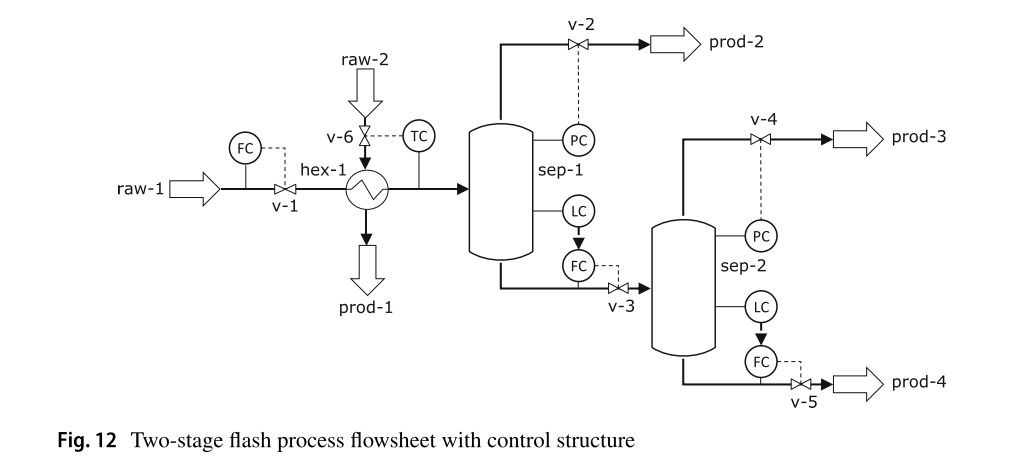

In [1]:
from IPython.display import Image
Image(filename = "images/image2.png")

## No controller Considered

In [2]:
# Graph
# How to construct graph with code:
import networkx as nx
"(raw)(v)(hex){1}(sep)[(v)(prod)](v)(sep)[(v)(prod)](v)(prod)n|(raw)(v)(hex){1}(prod)"
G = nx.DiGraph()
G.add_nodes_from([
    "raw-1","v-1","hex-1","sep-1","v-2","prod-1","v-3","sep-2","v-4","prod-2","raw-2","v-6","prod-4"
    ])
G.add_edges_from([
    ("raw-2","v-6"),
    ("v-6","hex-1"),
    ("hex-1","prod-4"),
    ("raw-1","v-1"),
    ("v-1","hex-1"),
    ("hex-1","sep-1"),
    ("sep-1","v-2"),
    ("v-2","prod-1"),
    ("sep-1","v-3"),
    ("v-3","sep-2"),
    ("sep-2","v-4"),
    ("v-4","prod-2")
    ])

Number of unit operations = 13
Number of controllers = 0
Number of indicators = 0 
Number of transmitters = 0


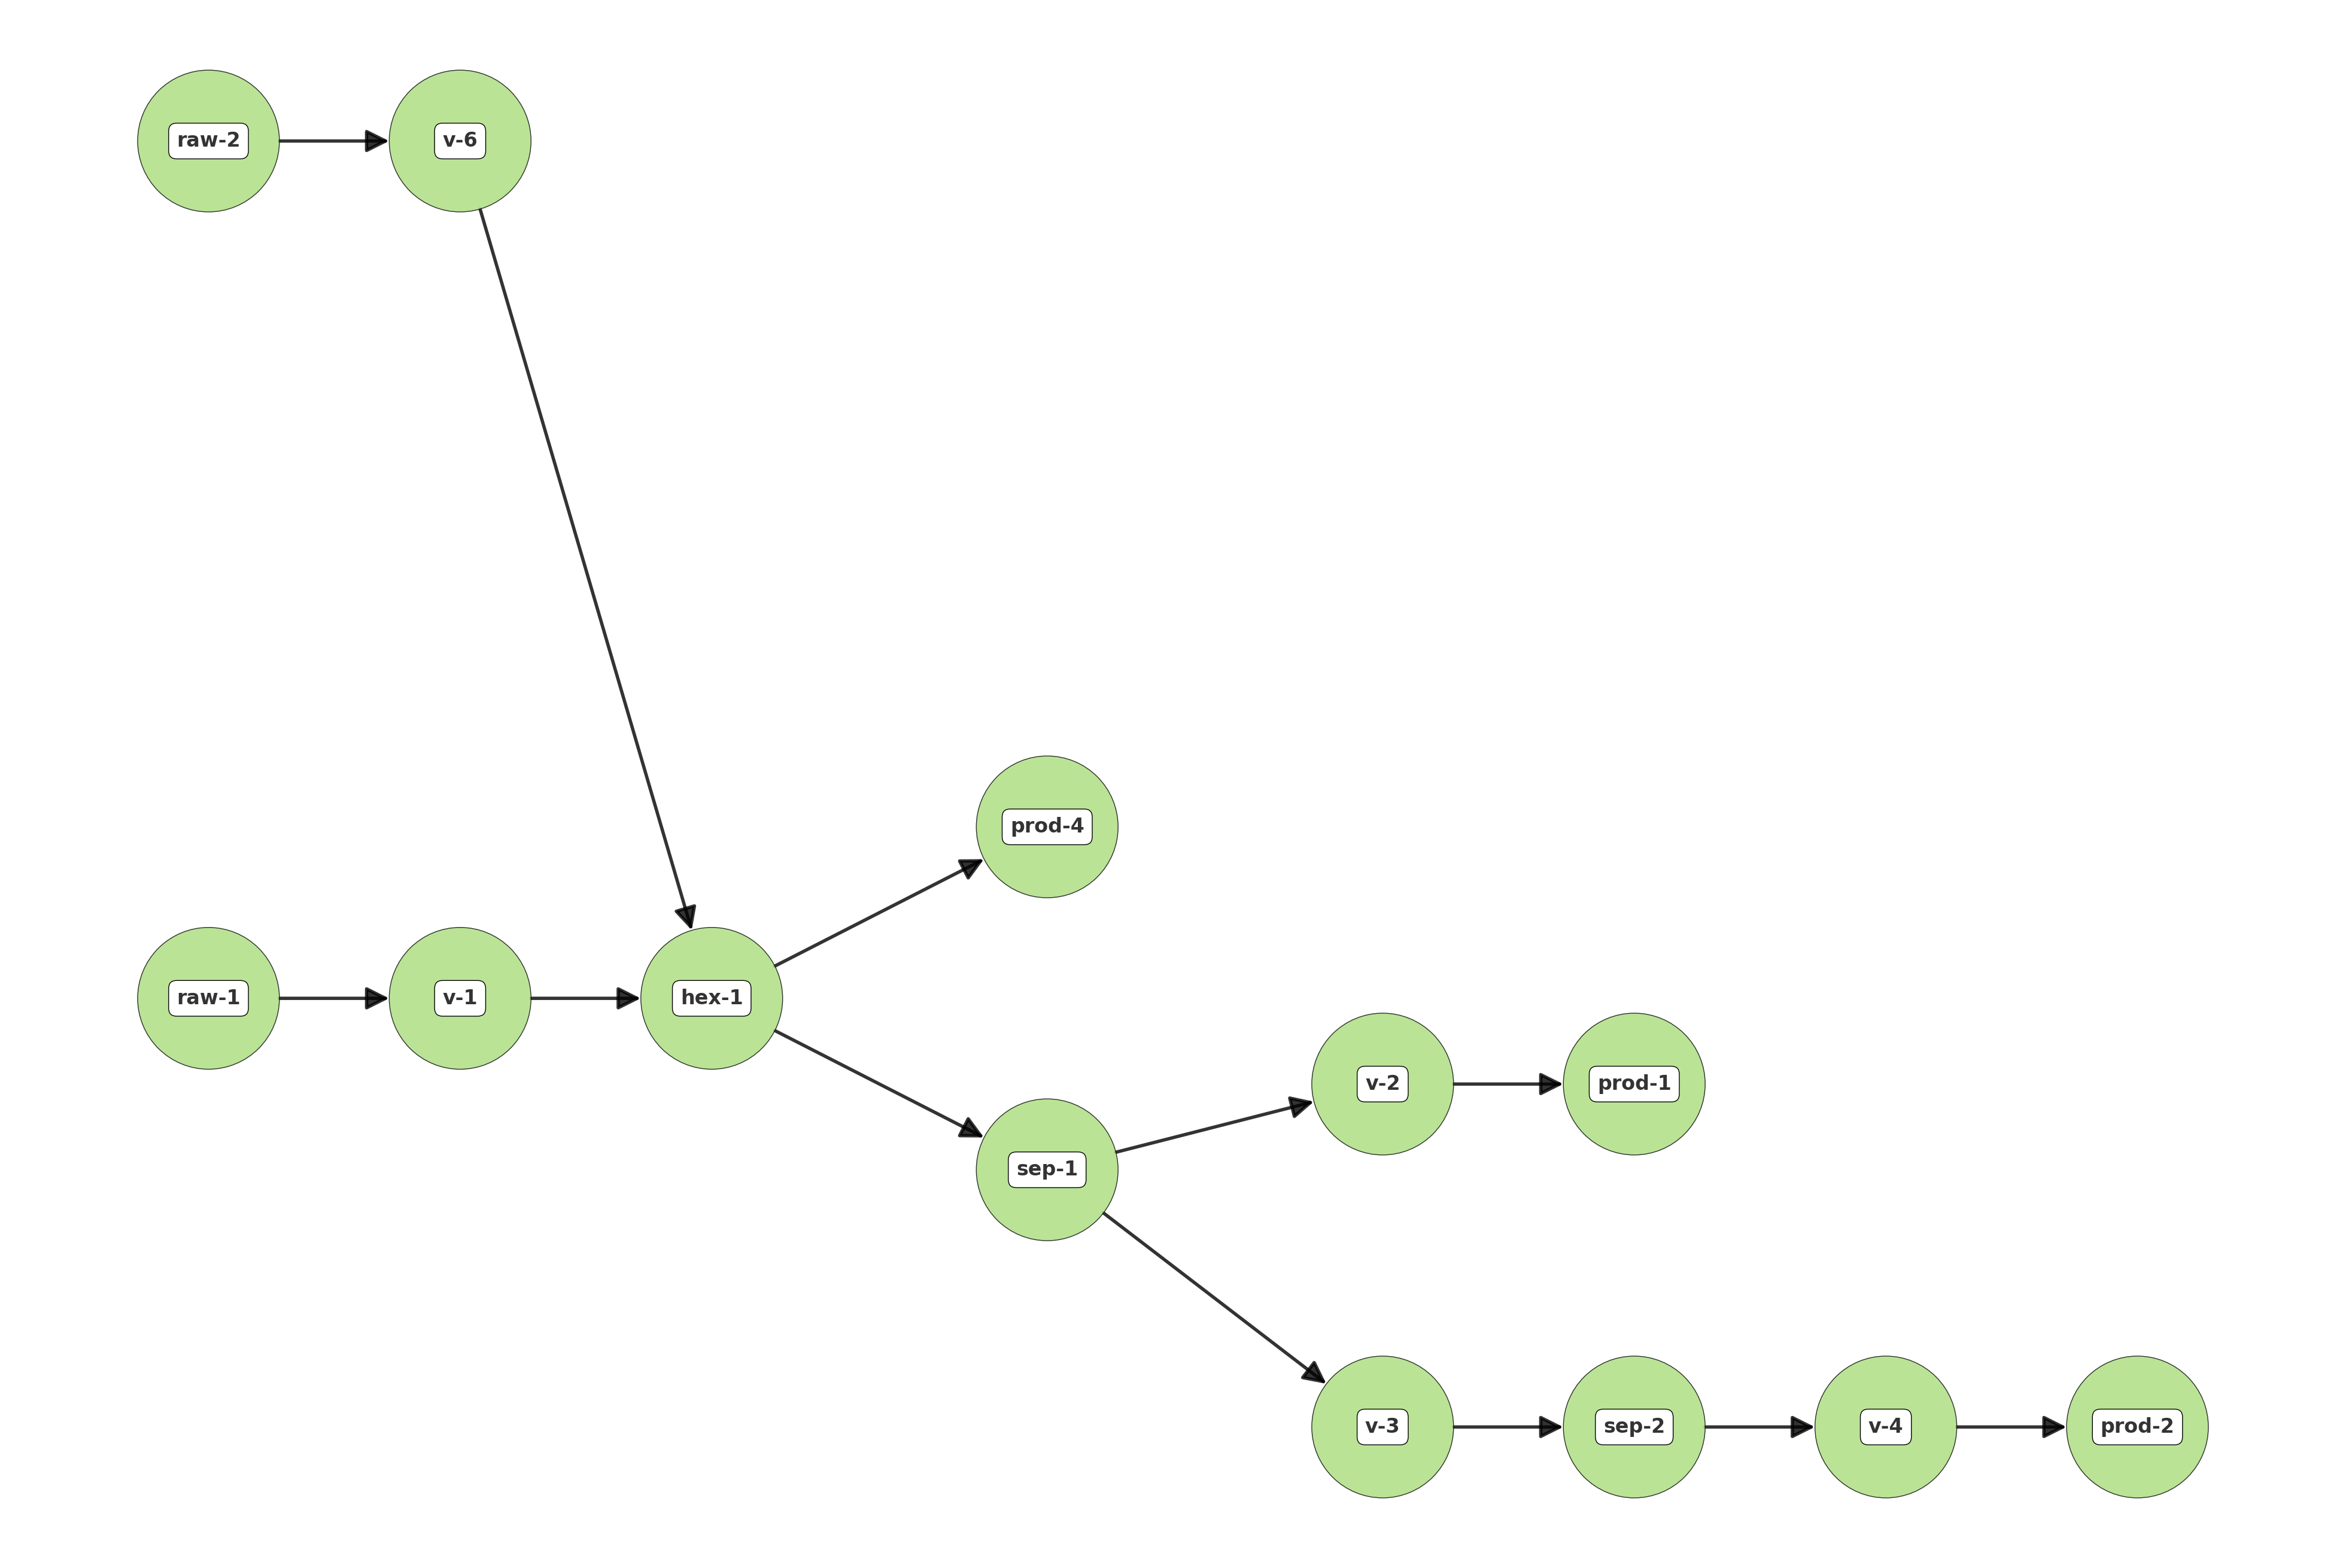

(<Figure size 3900x2600 with 1 Axes>, None, None)

In [3]:
# Save graph as flowsheet class object.
from Flowsheet_Class.flowsheet import Flowsheet
flowsheet_pfd=Flowsheet()
flowsheet_pfd.state=G
flowsheet_pfd.visualize_flowsheet(table=False, pfd_path="plots/flowsheet1", plot_with_stream_labels=False)


In [4]:
flowsheet_pfd.convert_to_sfiles(version="v2")
sfiles_1_pfd = flowsheet_pfd.sfiles
print(f"SFILE : {sfiles_1_pfd}")
flowsheet_pfd.create_from_sfiles(sfiles_1_pfd, overwrite_nx=True)
flowsheet_pfd.convert_to_sfiles(version="v2")
sfiles_2_pfd = flowsheet_pfd.sfiles
print("Conversion from SFILES to graph and back to SFILES successful!\n" if sfiles_1_pfd == sfiles_2_pfd
      else "Error encountered during conversion!")

SFILE : (raw)(v)(hex)<&|(raw)(v)&|[(prod)](sep)[(v)(prod)](v)(sep)(v)(prod)
Conversion from SFILES to graph and back to SFILES successful!



## Control Structures

In [5]:
# Graph
# How to construct graph with code:
import networkx as nx
G2 = nx.DiGraph()
G2.add_nodes_from([
    "raw-1","v-1","hex-1","sep-1","v-2","prod-1","v-3","sep-2","v-4","prod-2","raw-2","v-6","prod-4"
    ])
G2.add_edges_from([
    ("raw-2","v-6"),
    ("v-6","hex-1"),
    ("hex-1","prod-4"),
    ("raw-1","C-1/FC"),
    ("C-1/FC","v-1"),
    ("v-1","hex-1"),
    ("hex-1","C-2/TC"),
    ("C-2/TC","sep-1"),
    ("C-2/TC","v-6"),
    ("sep-1","C-3/PC"),
    ("C-3/PC","v-2"),
    ("v-2","prod-1"),
    ("sep-1","v-3"),
    ("v-3","sep-2"),
    ("sep-2","v-4"),
    ("v-4","prod-2")
    ])

Number of unit operations = 13
Number of controllers = 3
Number of indicators = 0 
Number of transmitters = 0


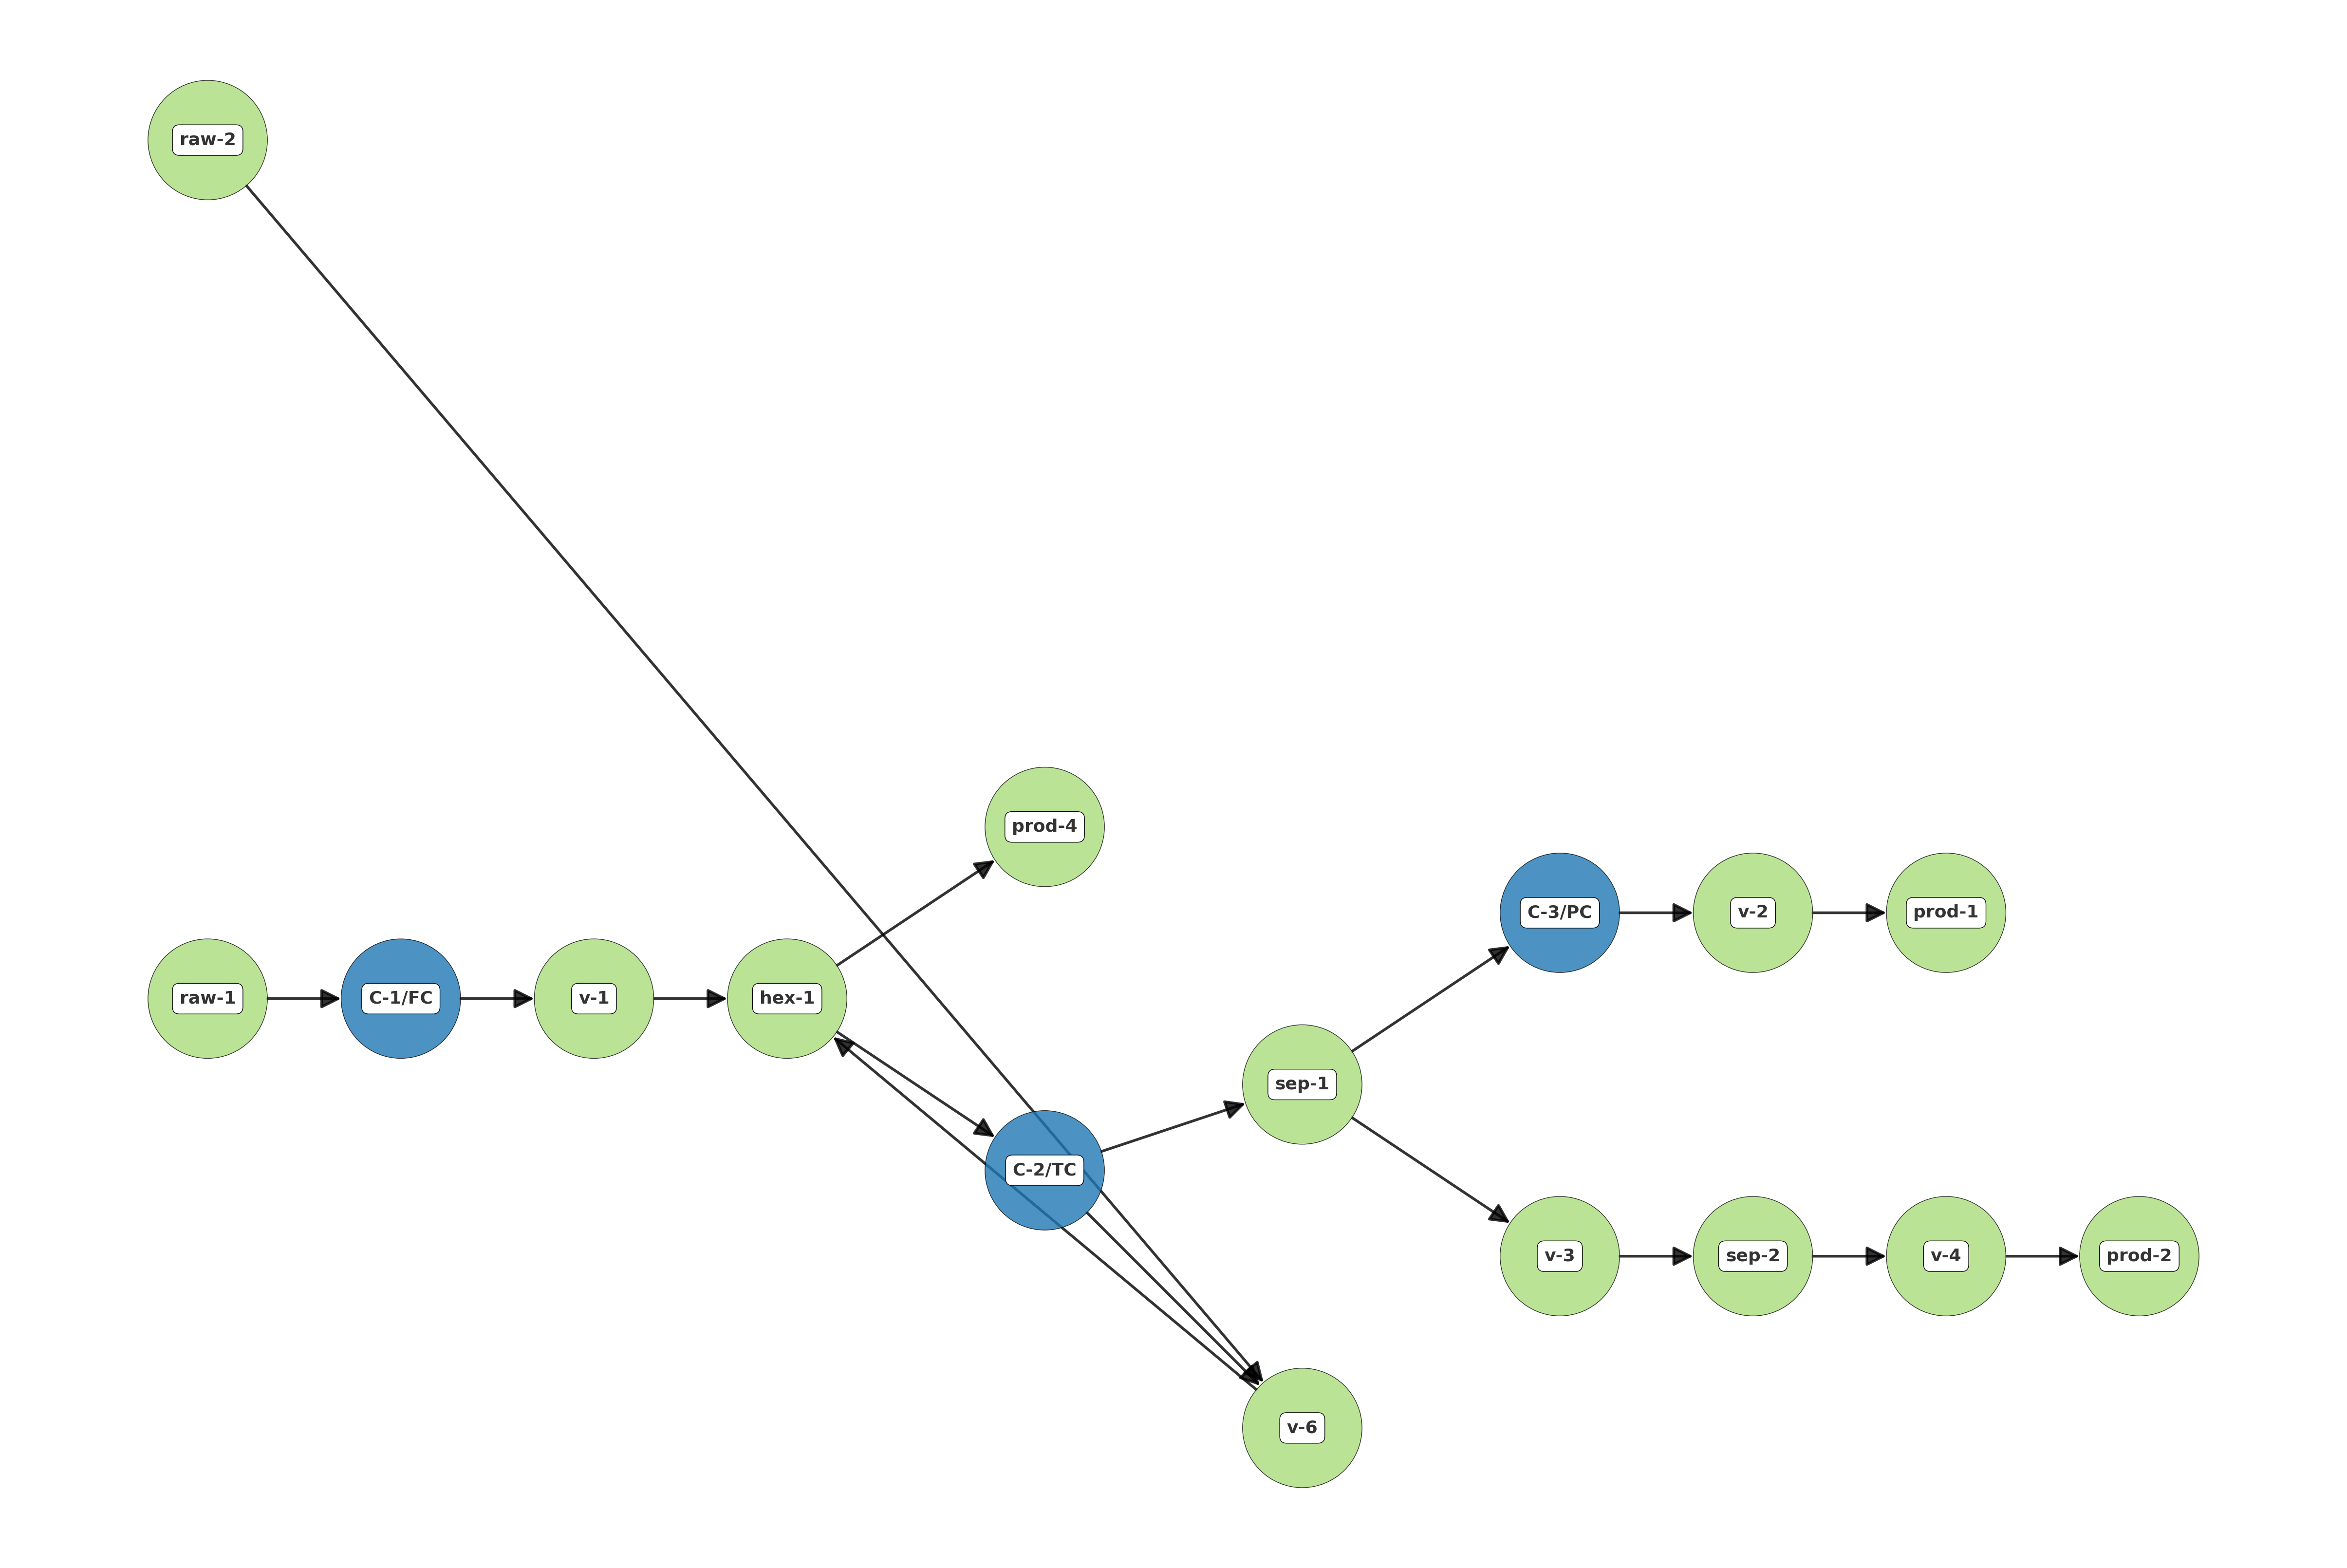

(<Figure size 4800x3200 with 1 Axes>, None, None)

In [6]:
# Save graph as flowsheet class object.
from Flowsheet_Class.flowsheet import Flowsheet
flowsheet_pid=Flowsheet()
flowsheet_pid.state=G2
flowsheet_pid.visualize_flowsheet(table=False, pfd_path="plots/flowsheet1", plot_with_stream_labels=False)


# Common Functions

In [7]:
#!pip install networkx

In [8]:
def plotFlowSheet(graph):
    from Flowsheet_Class.flowsheet import Flowsheet
    flowsheet =Flowsheet()
    flowsheet.state=graph
    flowsheet.visualize_flowsheet(table=False, pfd_path="plots/flowsheet1", plot_with_stream_labels=False)

def sfiles_generate_validate(graph):
    from Flowsheet_Class.flowsheet import Flowsheet
    flowsheet =Flowsheet()
    flowsheet.state=graph
    flowsheet.convert_to_sfiles(version="v2")
    sfiles_1 = flowsheet.sfiles
    print(f"SFILE : {sfiles_1}")
    flowsheet.create_from_sfiles(sfiles_1, overwrite_nx=True)
    flowsheet.convert_to_sfiles(version="v2")
    sfiles_2 = flowsheet.sfiles
    print("Conversion from SFILES to graph and back to SFILES successful!\n" if sfiles_1 == sfiles_2
        else "Error encountered during conversion!")


# 1. Control of CSTR

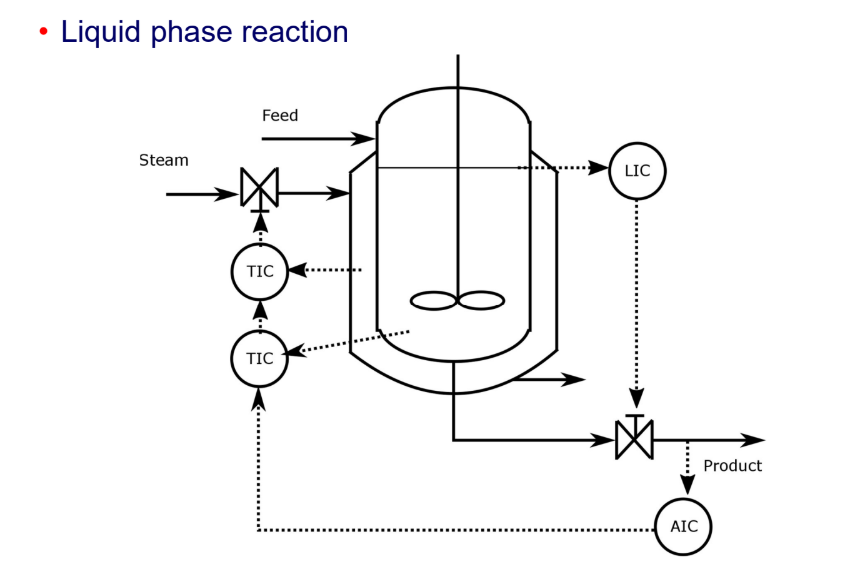

In [9]:
from IPython.display import Image
Image(filename = "images/CSTR_liquid_phase.png")

In [10]:
import networkx as nx
graph_CSTR_1 = nx.DiGraph()
graph_CSTR_1.add_edges_from([
   ("raw-1","r-1"),
   ("raw-2","v-1"),
    ("v-1","hex-1"),
    ("hex-1","r-1"),
    ("hex-1","prod-2"),
    ("r-1","v-2"),
    ("v-2","prod-1"),
])


Number of unit operations = 8
Number of controllers = 0
Number of indicators = 0 
Number of transmitters = 0


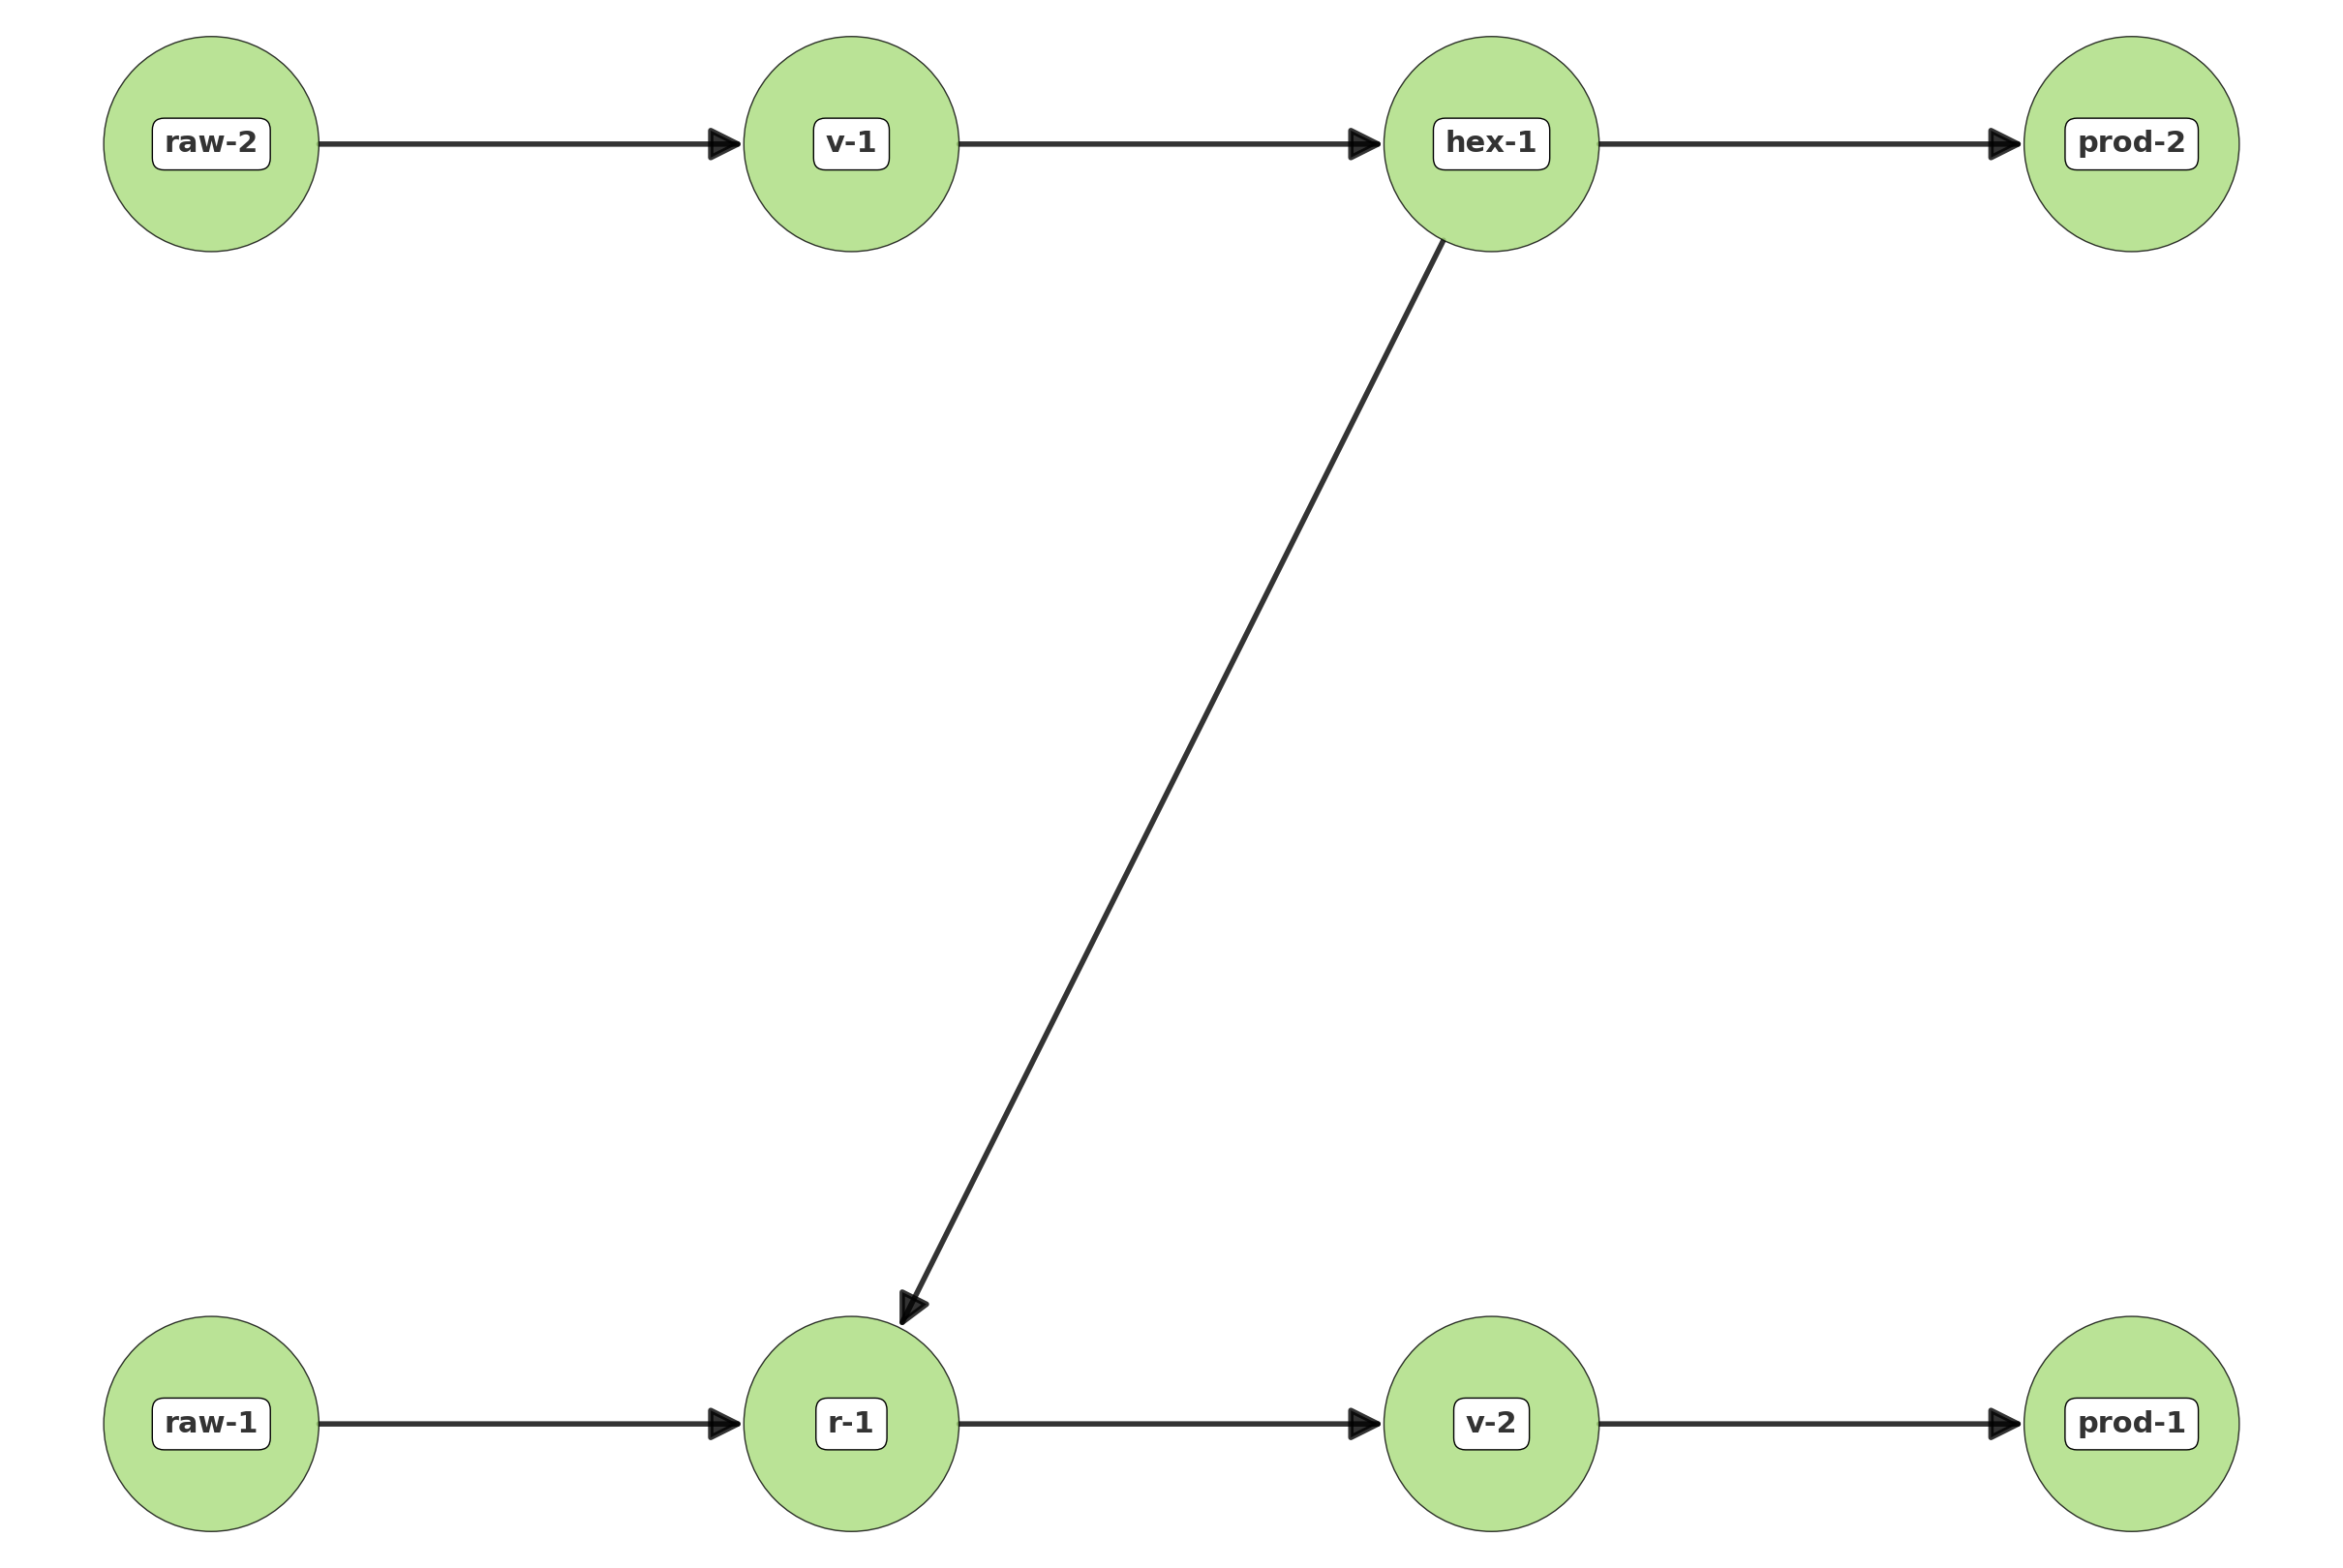

SFILE : (raw)(v)(hex)[(prod)](r)<&|(raw)&|(v)(prod)
Conversion from SFILES to graph and back to SFILES successful!



In [11]:
plotFlowSheet(graph_CSTR_1)
sfiles_generate_validate(graph_CSTR_1)

In [12]:
import networkx as nx
graph_CSTR_2 = nx.DiGraph()
graph_CSTR_2.add_edges_from([
   ("raw-1","r-1"),
   ("raw-2","v-1"),
    ("v-1","hex-1"),
    ("hex-1","r-1"),
    ("hex-1","prod-2"),
    ("hex-1","C-1/TC"),
    ("r-1","C-2/TC"),
    ("C-2/TC","C-1/TC", {"tags":{"signal": ["not_next_unitop"]}}),
    ("C-1/TC","v-1", {"tags":{"signal": ["not_next_unitop"]}}),
    ("r-1","v-2"),
    ("r-1","C-3/LC"),
    ("C-3/LC","v-2", {"tags":{"signal": ["next_unitop"]}}),
    ("v-2","prod-1"),
])


Number of unit operations = 8
Number of controllers = 3
Number of indicators = 0 
Number of transmitters = 0


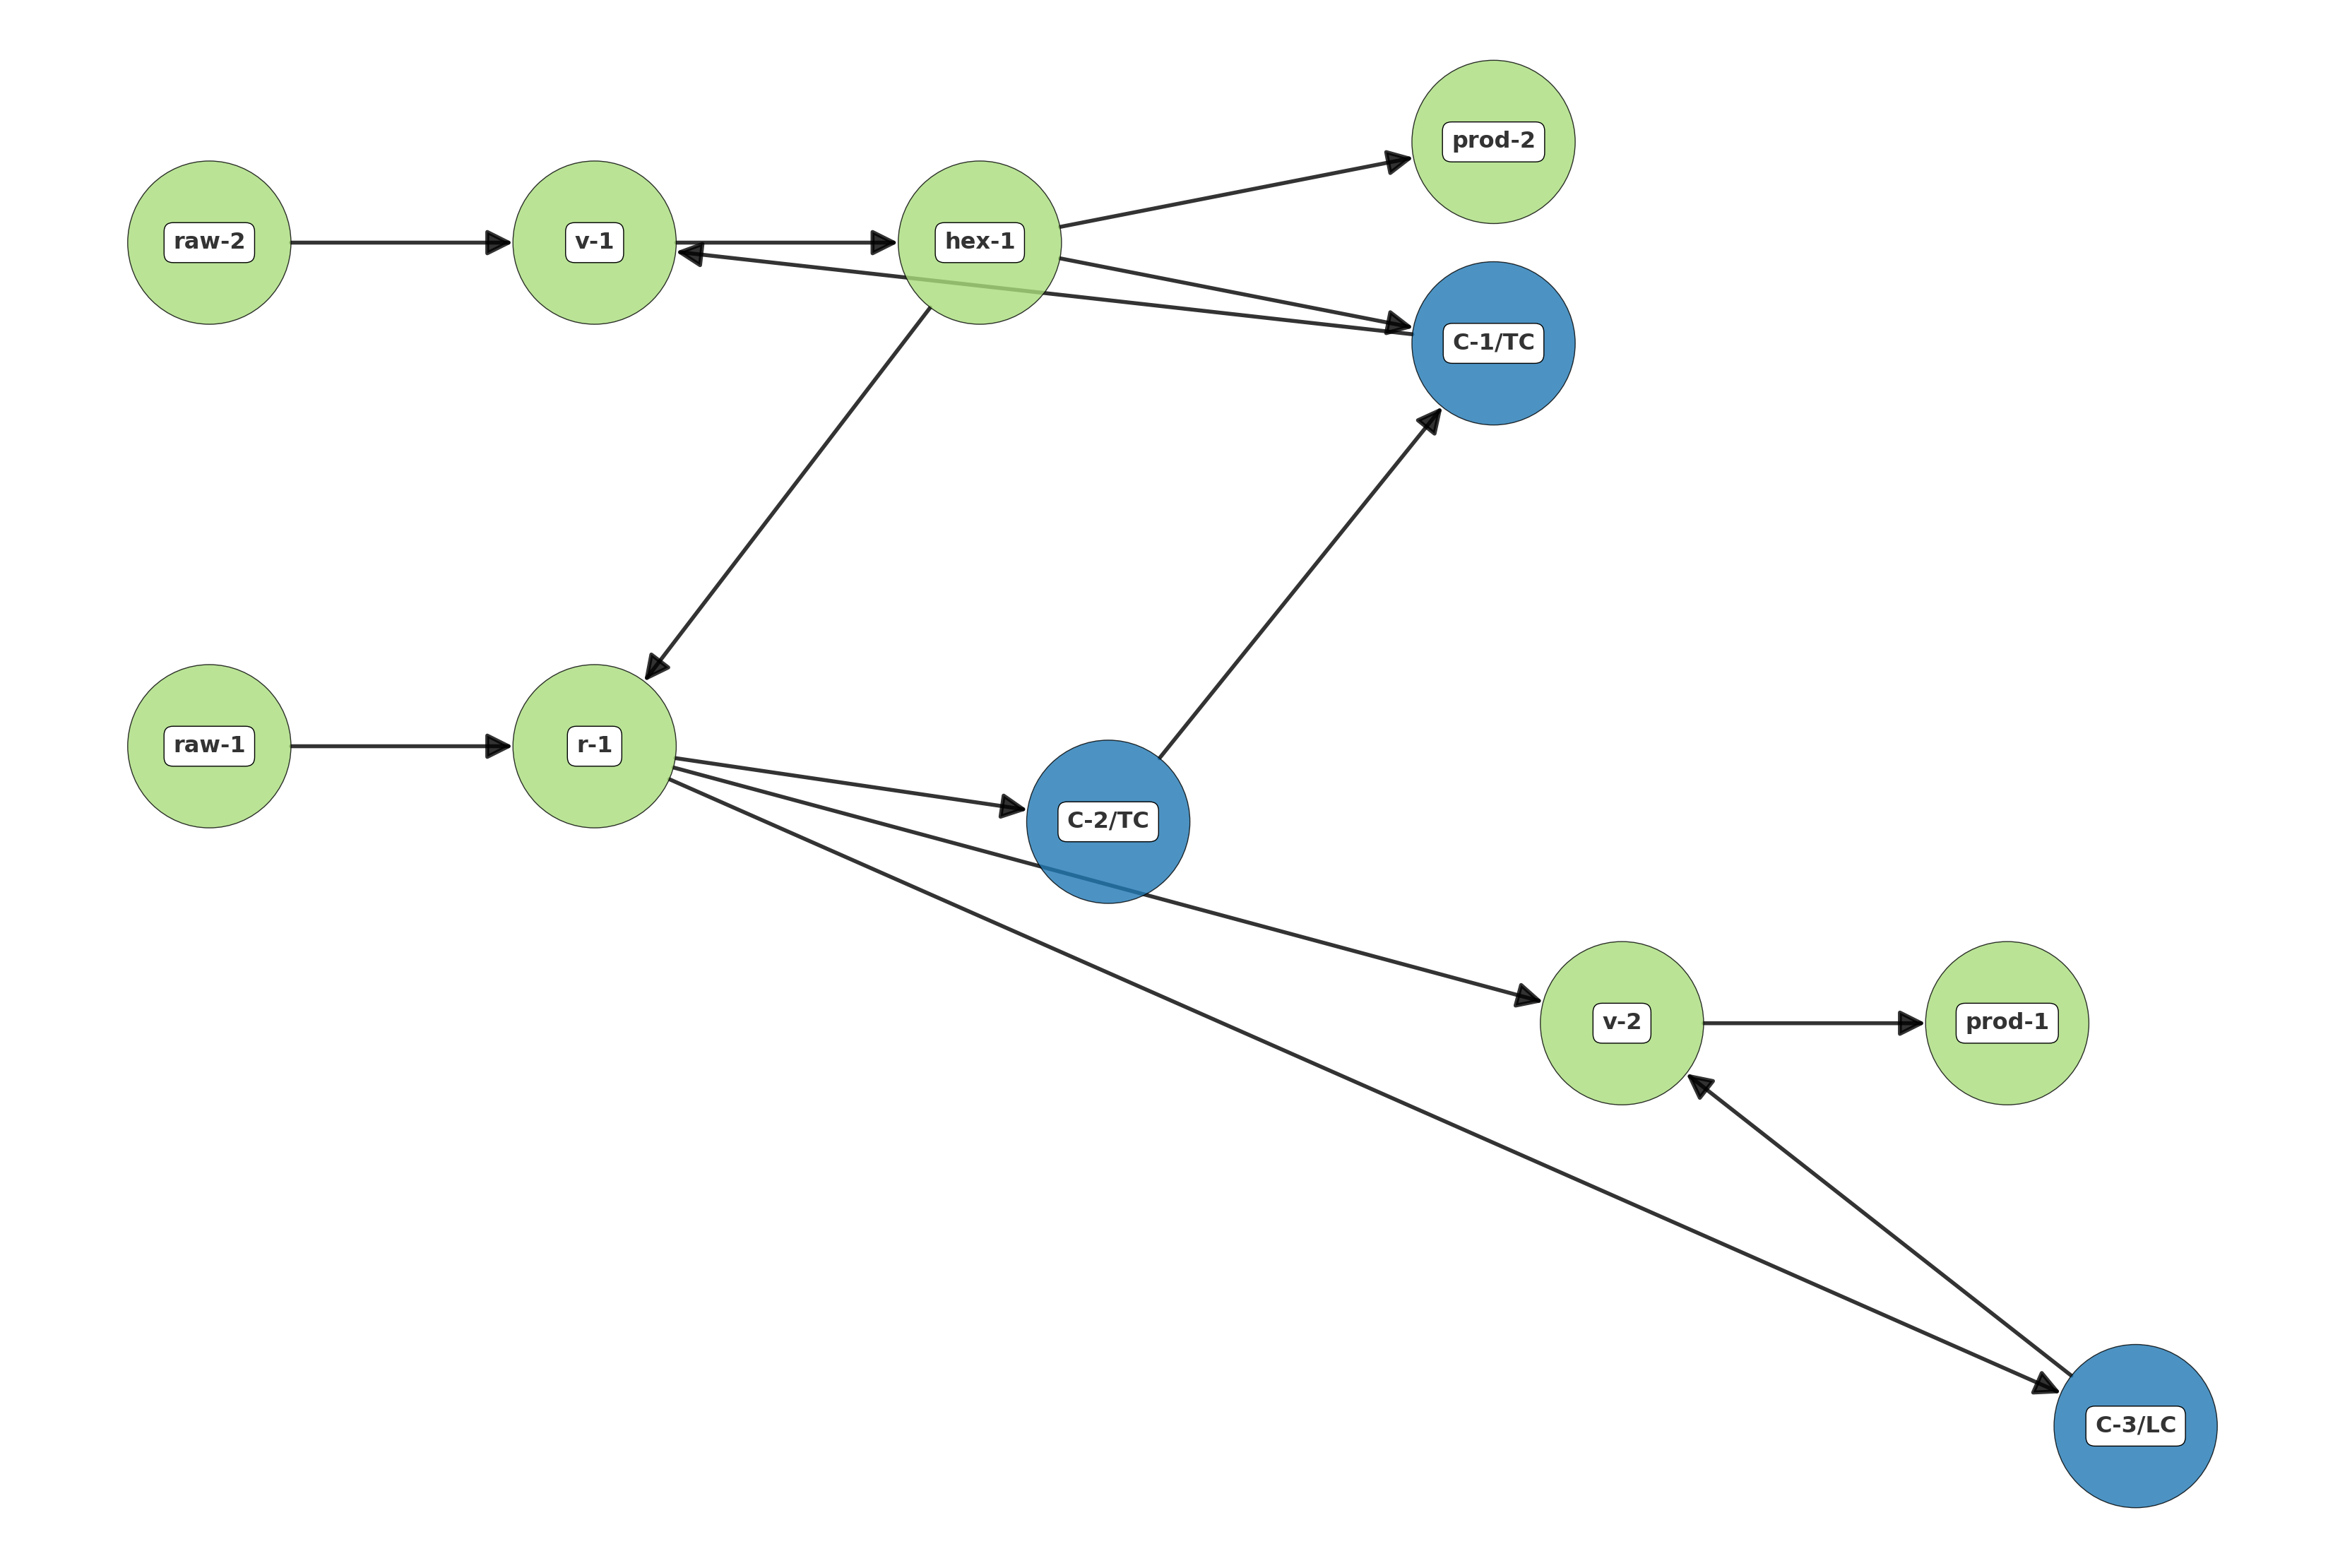

SFILE : (raw)(v)<_1(hex)[(C){TC}_1<_2][(prod)](r)1<&|(raw)&|[(C){TC}_2][(C){LC}_3(v)<1<_3(prod)]
Conversion from SFILES to graph and back to SFILES successful!



In [13]:
plotFlowSheet(graph_CSTR_2)
sfiles_generate_validate(graph_CSTR_2)

# 2. Control of Packed-bed Reactor

In [14]:
from IPython.display import Image


In [15]:
import networkx as nx
graph_pbr = nx.DiGraph()
graph_pbr.add_edges_from([
   ("raw-1","v-1"),
   ("v-1","r-1"),
   ("v-2","r-1"),
   ("raw-2","v-2"),
   ("r-1","v-3"),
   ("v-3","prod-1")
])


Number of unit operations = 7
Number of controllers = 0
Number of indicators = 0 
Number of transmitters = 0


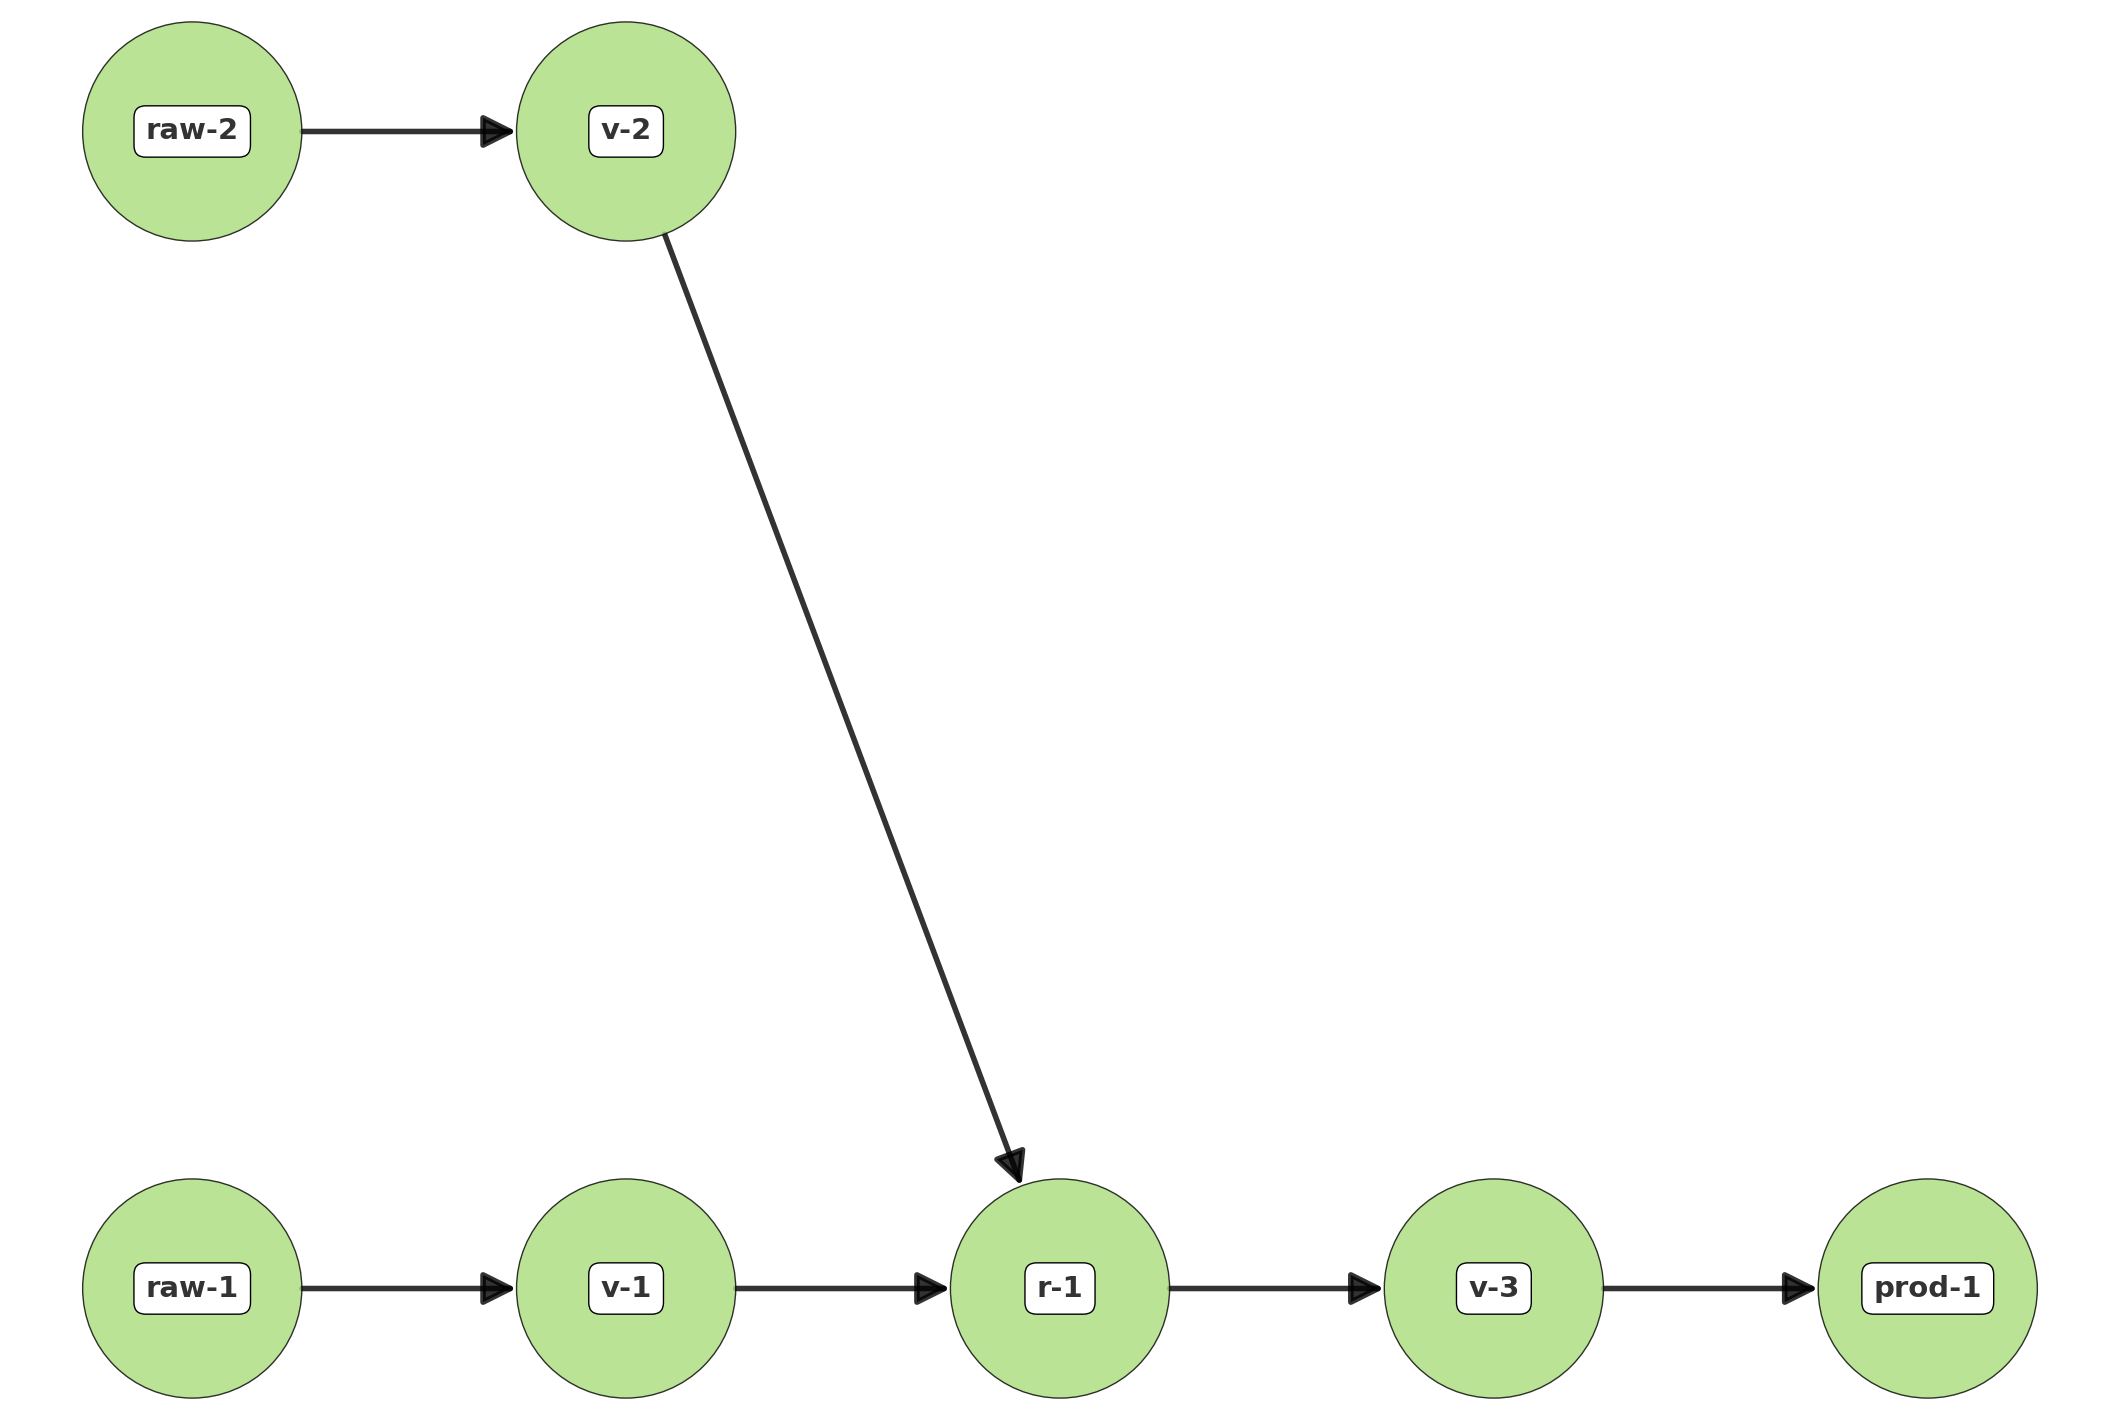

SFILE : (raw)(v)(r)<&|(raw)(v)&|(v)(prod)
Conversion from SFILES to graph and back to SFILES successful!



In [16]:
plotFlowSheet(graph_pbr)
sfiles_generate_validate(graph_pbr)

In [17]:
import networkx as nx
graph_pbr_1 = nx.DiGraph()
graph_pbr_1.add_edges_from([
   ("raw-1","v-1"),
   ("v-1","r-1"),
   ("v-2","r-1"),
   ("raw-2","v-2"),
   ("r-1","C-1/TC"),
   ("C-1/TC","v-2", {"tags":{"signal": ["not_next_unitop"]}}),
   ("C-2/TC","v-1",{"tags":{"signal": ["not_next_unitop"]}}),
   ("r-1","C-2/TC"),
   ("C-2/TC","C-3/PC"),
   ("C-3/PC","v-3",{"tags":{"signal": ["next_unitop"]}}),
   ("v-3","prod-1")
])


Number of unit operations = 7
Number of controllers = 3
Number of indicators = 0 
Number of transmitters = 0


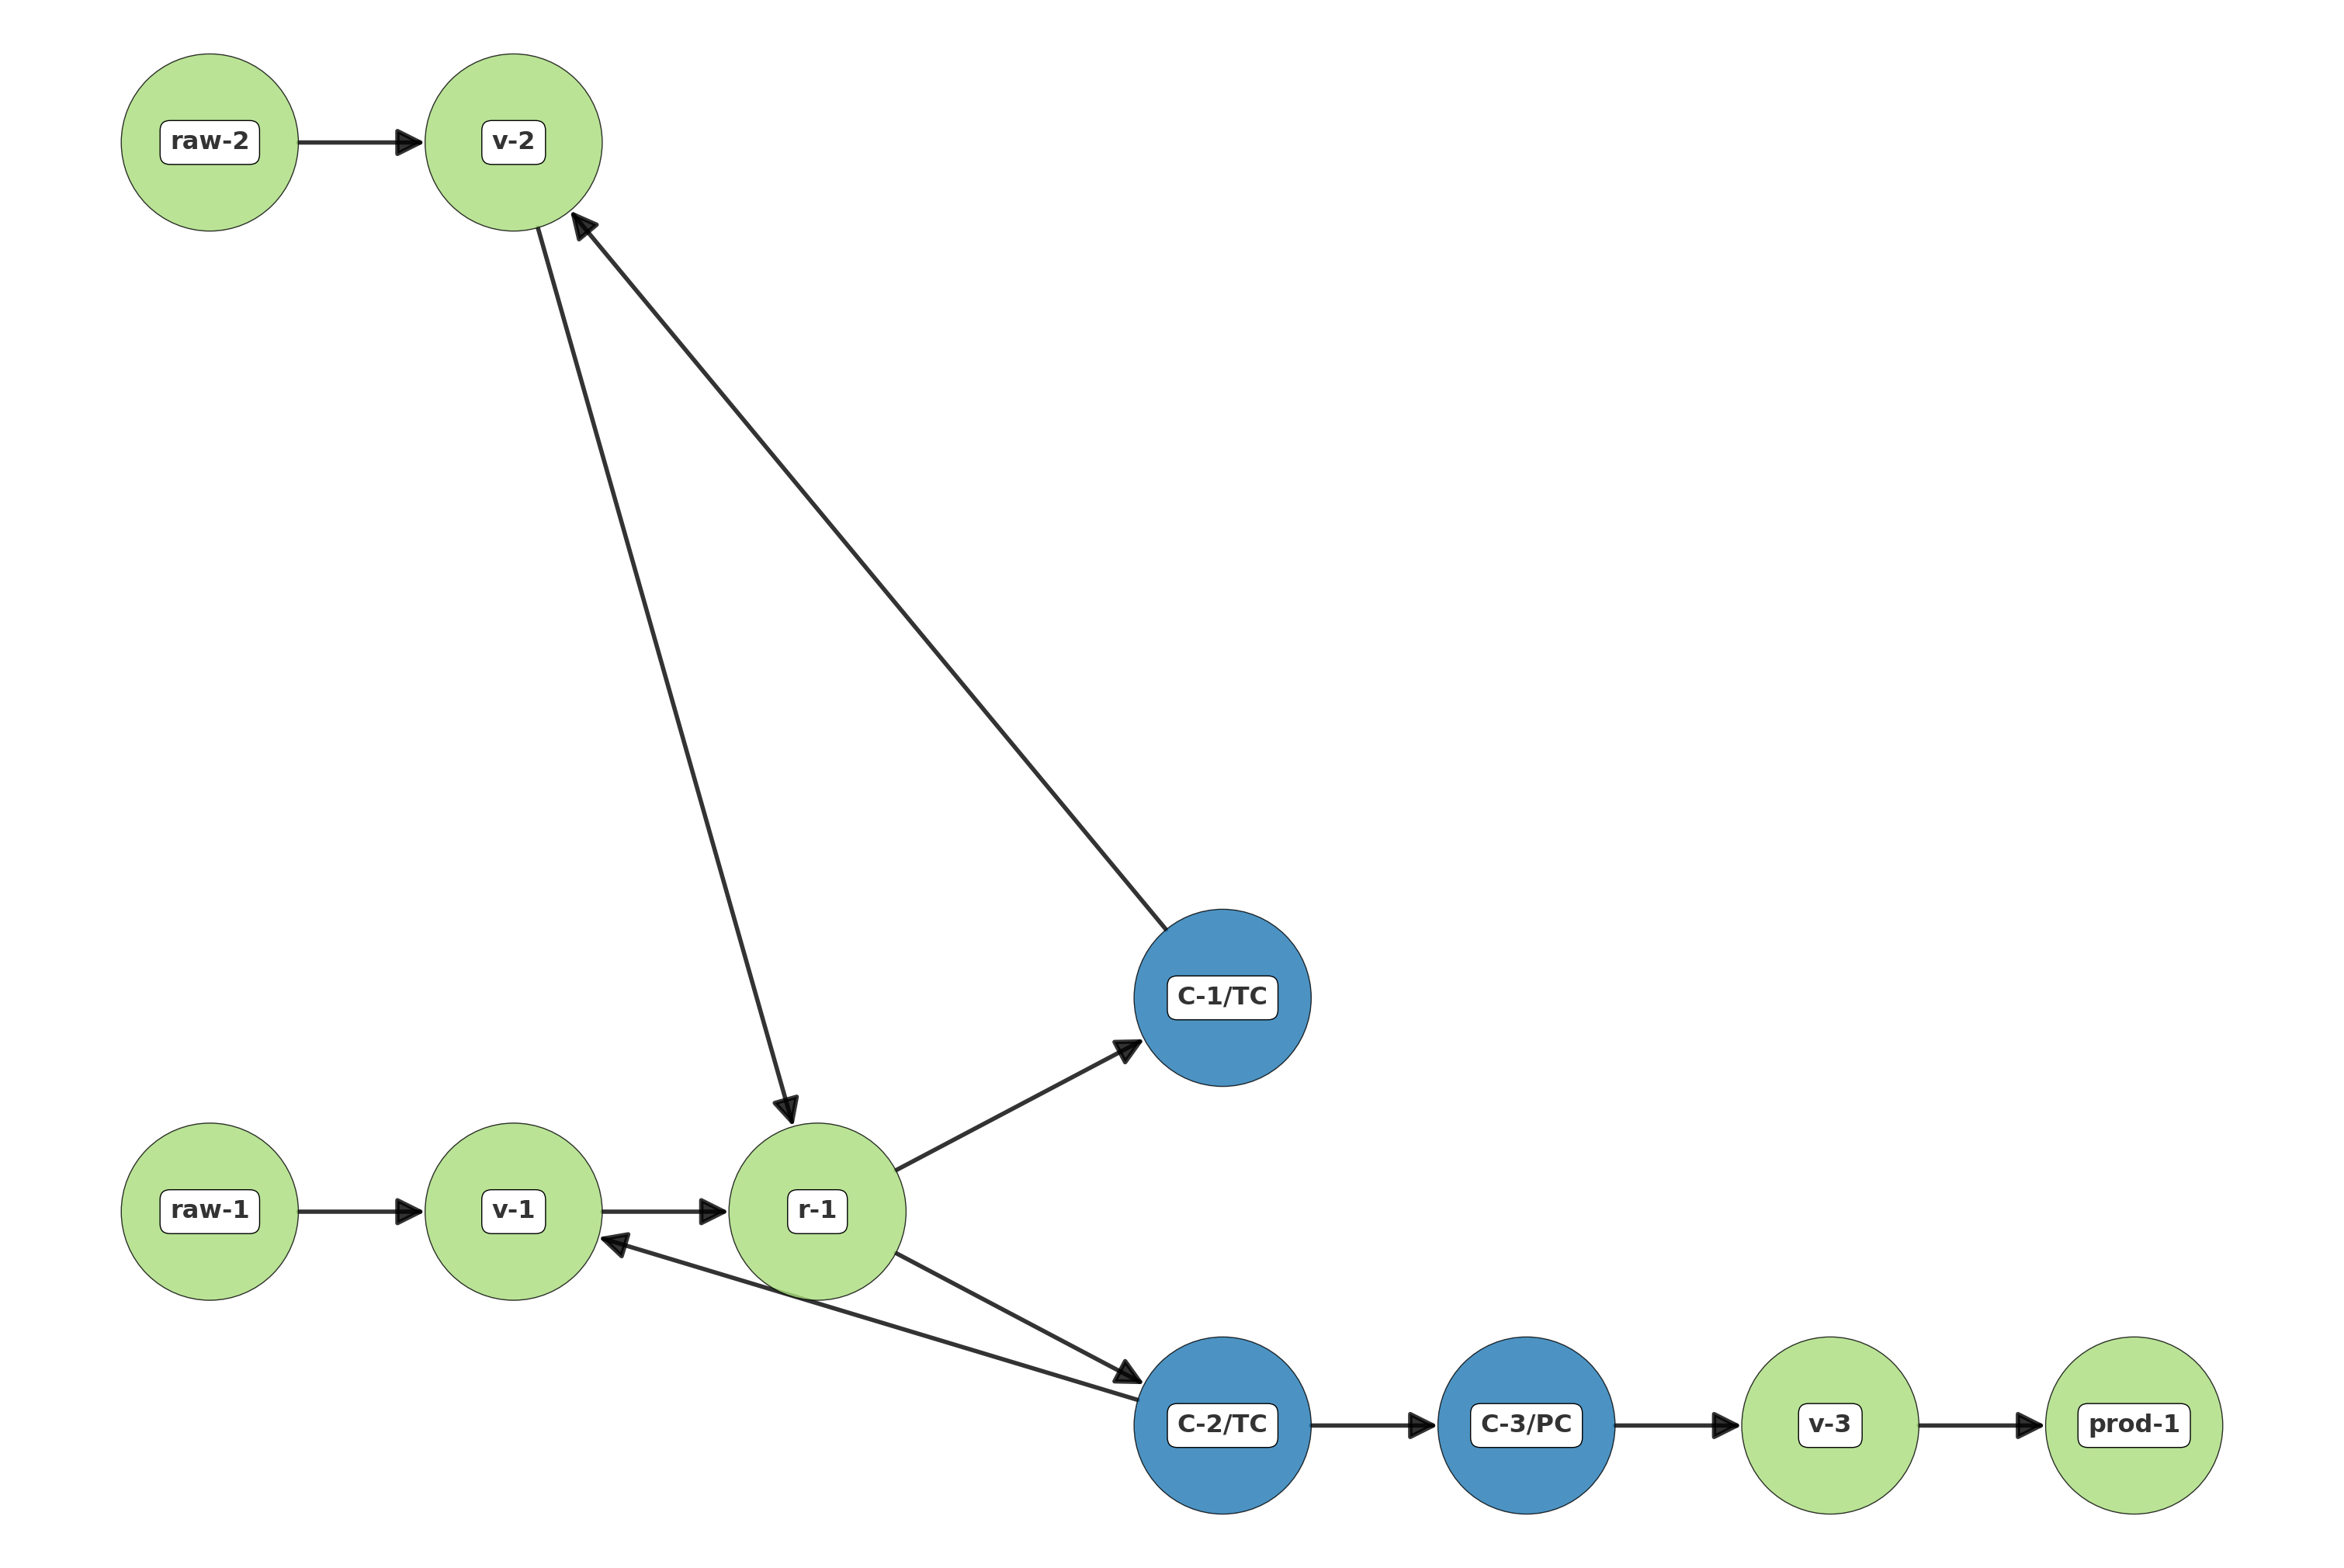

SFILE : (raw)(v)<_2(r)<&|(raw)(v)&<_1|[(C){TC}_1](C){TC}_2(C){PC}_3(v)<_3(prod)
Conversion from SFILES to graph and back to SFILES successful!



In [18]:
plotFlowSheet(graph_pbr_1)
sfiles_generate_validate(graph_pbr_1)

# 3. Control of Heat Exchanger

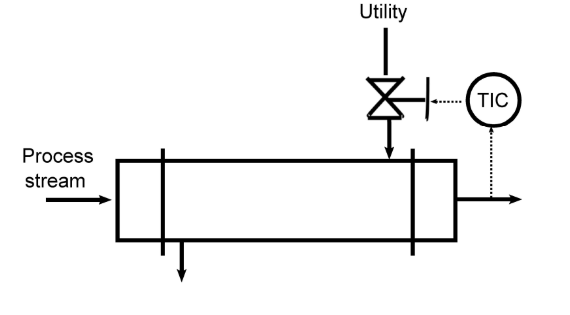

In [19]:
from IPython.display import Image
Image(filename = "images/heat_exchanger.png")

## PFD

In [20]:
import networkx as nx
graph_heat_exchanger = nx.DiGraph()
graph_heat_exchanger.add_edges_from([
   ("raw-1","hex-1"),
   ("raw-2","v-1"),
    ("v-1","hex-1"),
    ("hex-1","prod-1"),
    ("hex-1","prod-2"),
    ("raw-2","v-1"),
])


Number of unit operations = 6
Number of controllers = 0
Number of indicators = 0 
Number of transmitters = 0


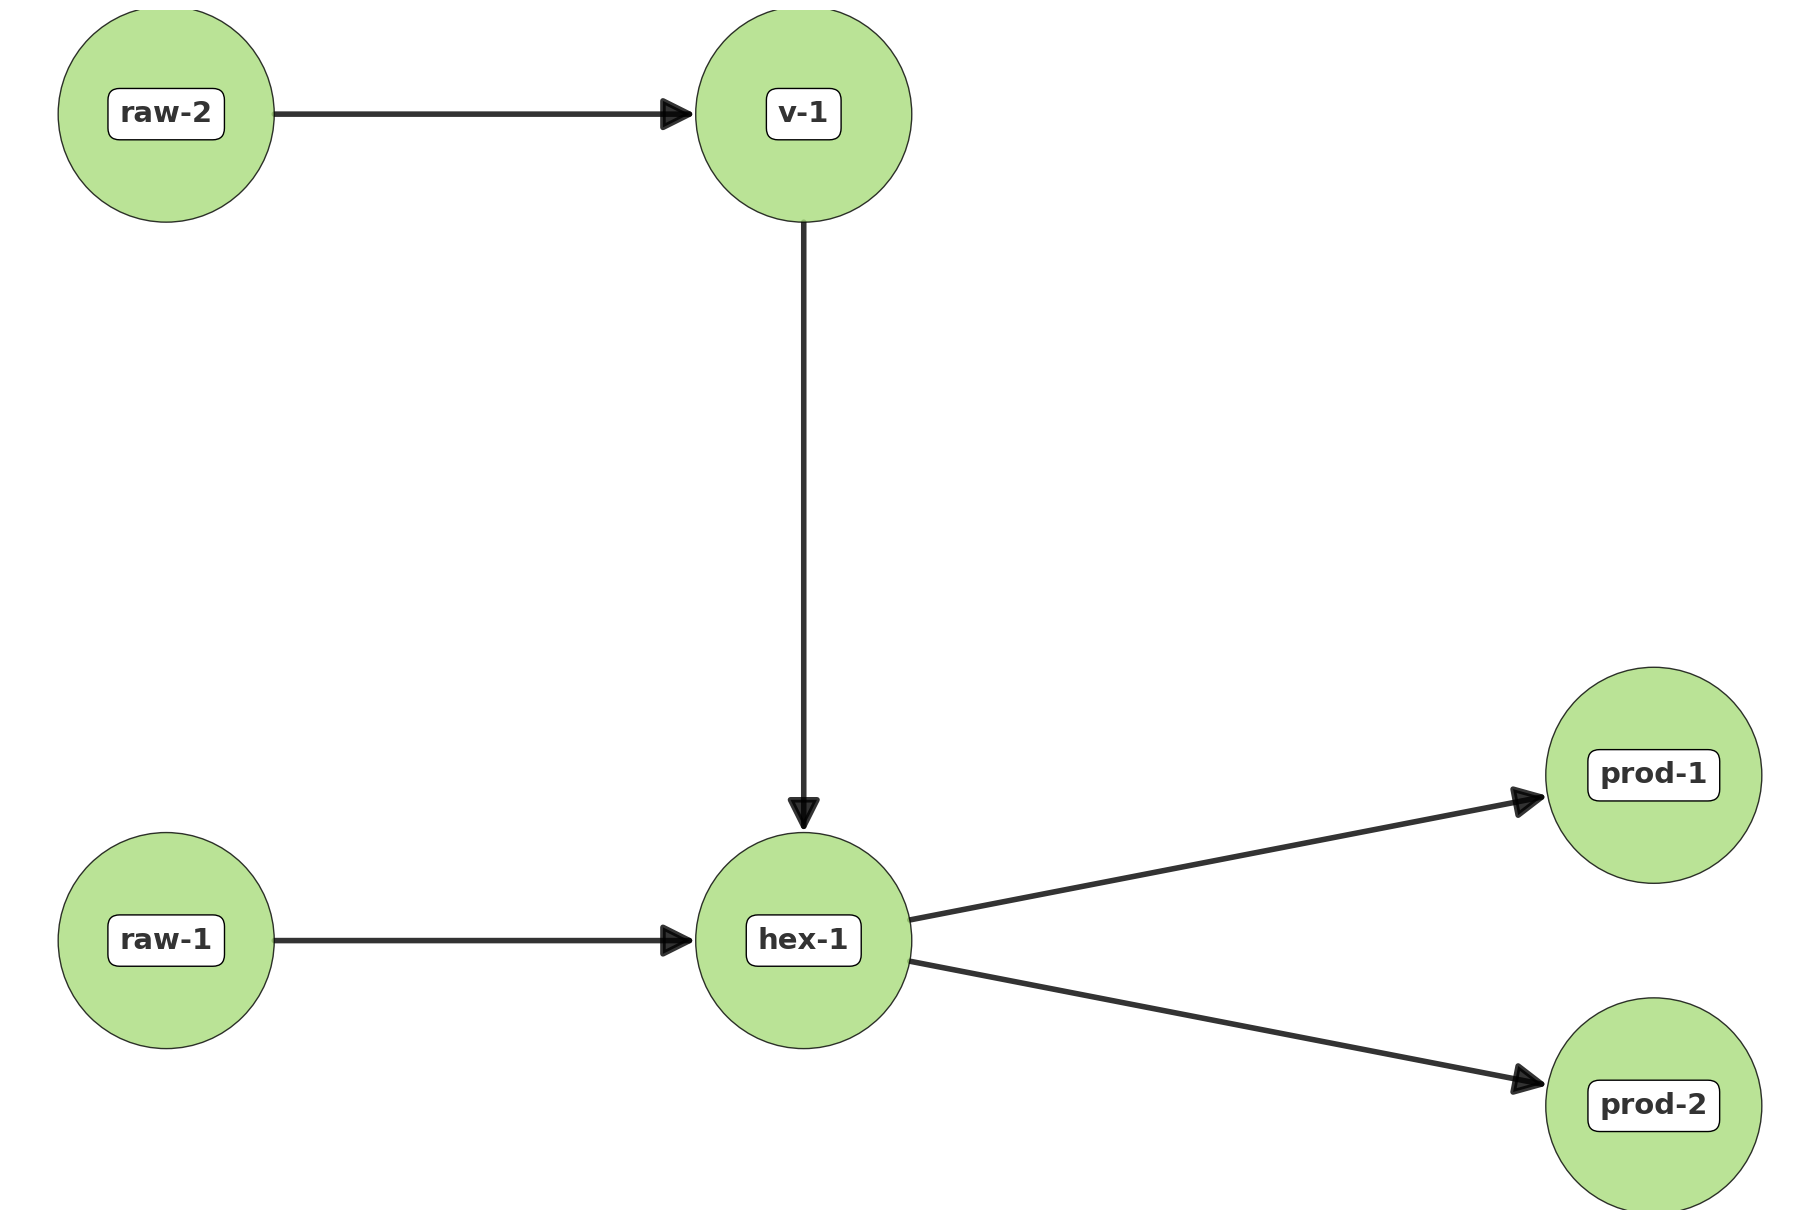

SFILE : (raw)(v)(hex)<&|(raw)&|[(prod)](prod)
Conversion from SFILES to graph and back to SFILES successful!



In [21]:
plotFlowSheet(graph_heat_exchanger)
sfiles_generate_validate(graph_heat_exchanger)

## P&ID

In [22]:
import networkx as nx
graph_heat_exchanger_1 = nx.DiGraph()
graph_heat_exchanger_1.add_edges_from([
   ("raw-1","hex-1"),
   ("raw-2","v-1"),
    ("v-1","hex-1"),
    ("hex-1","C-1/TC"),
    ("C-1/TC","prod-1"),
    ("C-1/TC","v-1",{"tags":{"signal": ["not_next_unitop"]}}),
    ("hex-1","prod-2"),
    ("raw-2","v-1"),
])


Number of unit operations = 6
Number of controllers = 1
Number of indicators = 0 
Number of transmitters = 0


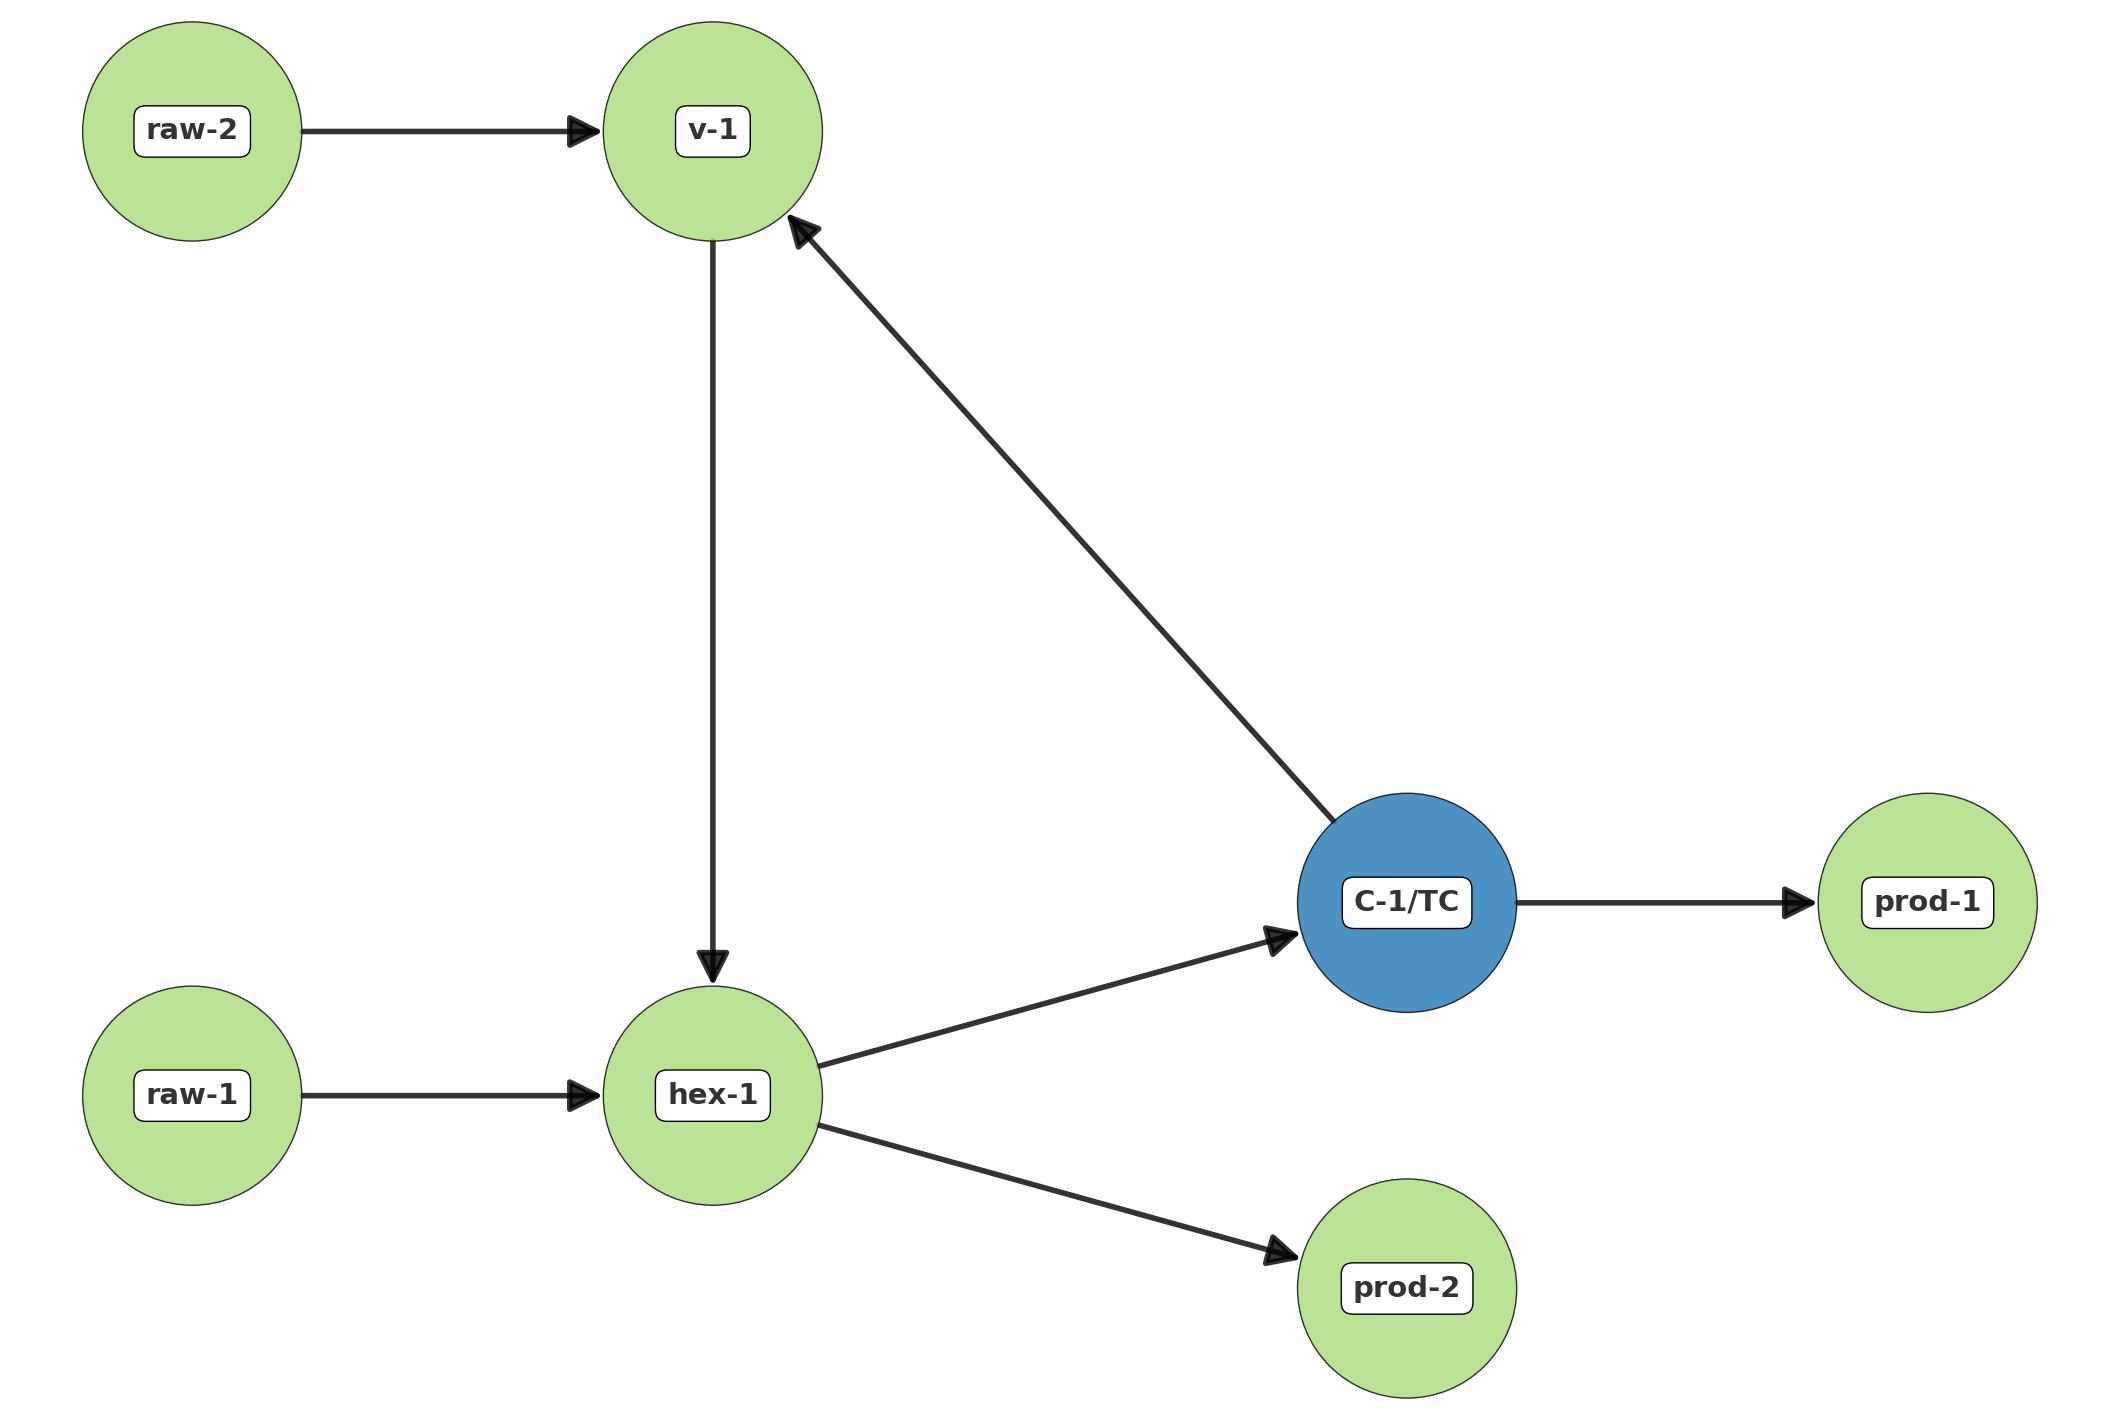

SFILE : (raw)(v)<_1(hex)<&|(raw)&|[(prod)](C){TC}_1(prod)
Conversion from SFILES to graph and back to SFILES successful!



In [23]:
plotFlowSheet(graph_heat_exchanger_1)
sfiles_generate_validate(graph_heat_exchanger_1)

# 4. Flash Vessel Control

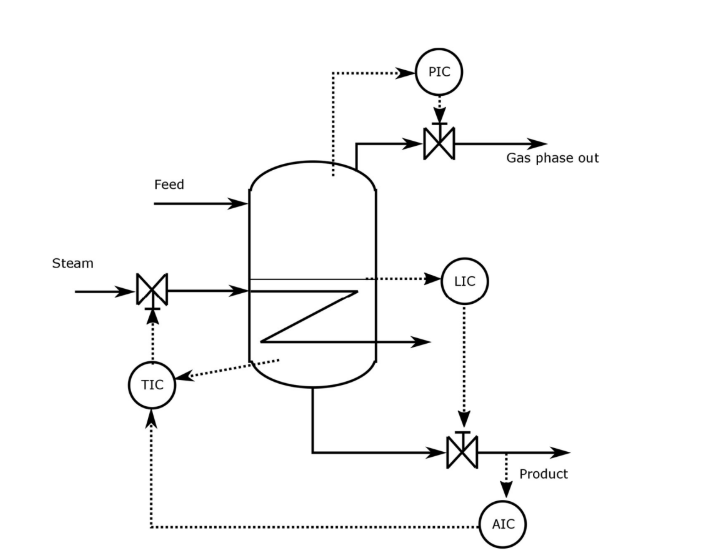

In [24]:
from IPython.display import Image
Image(filename = "images/flash_vessel.png")

## PFD

In [25]:
import networkx as nx
graph_flash_vessel = nx.DiGraph()
graph_flash_vessel.add_edges_from([
   ("raw-1","sep-1"),
   ("raw-2","v-1"),
    ("v-1","sep-1"),
    ("sep-1","prod-3"),
    ("sep-1","v-2"),
    ("sep-1","v-3"),
    ("v-2","prod-1"),
    ("v-3","prod-2")
])


Number of unit operations = 9
Number of controllers = 0
Number of indicators = 0 
Number of transmitters = 0


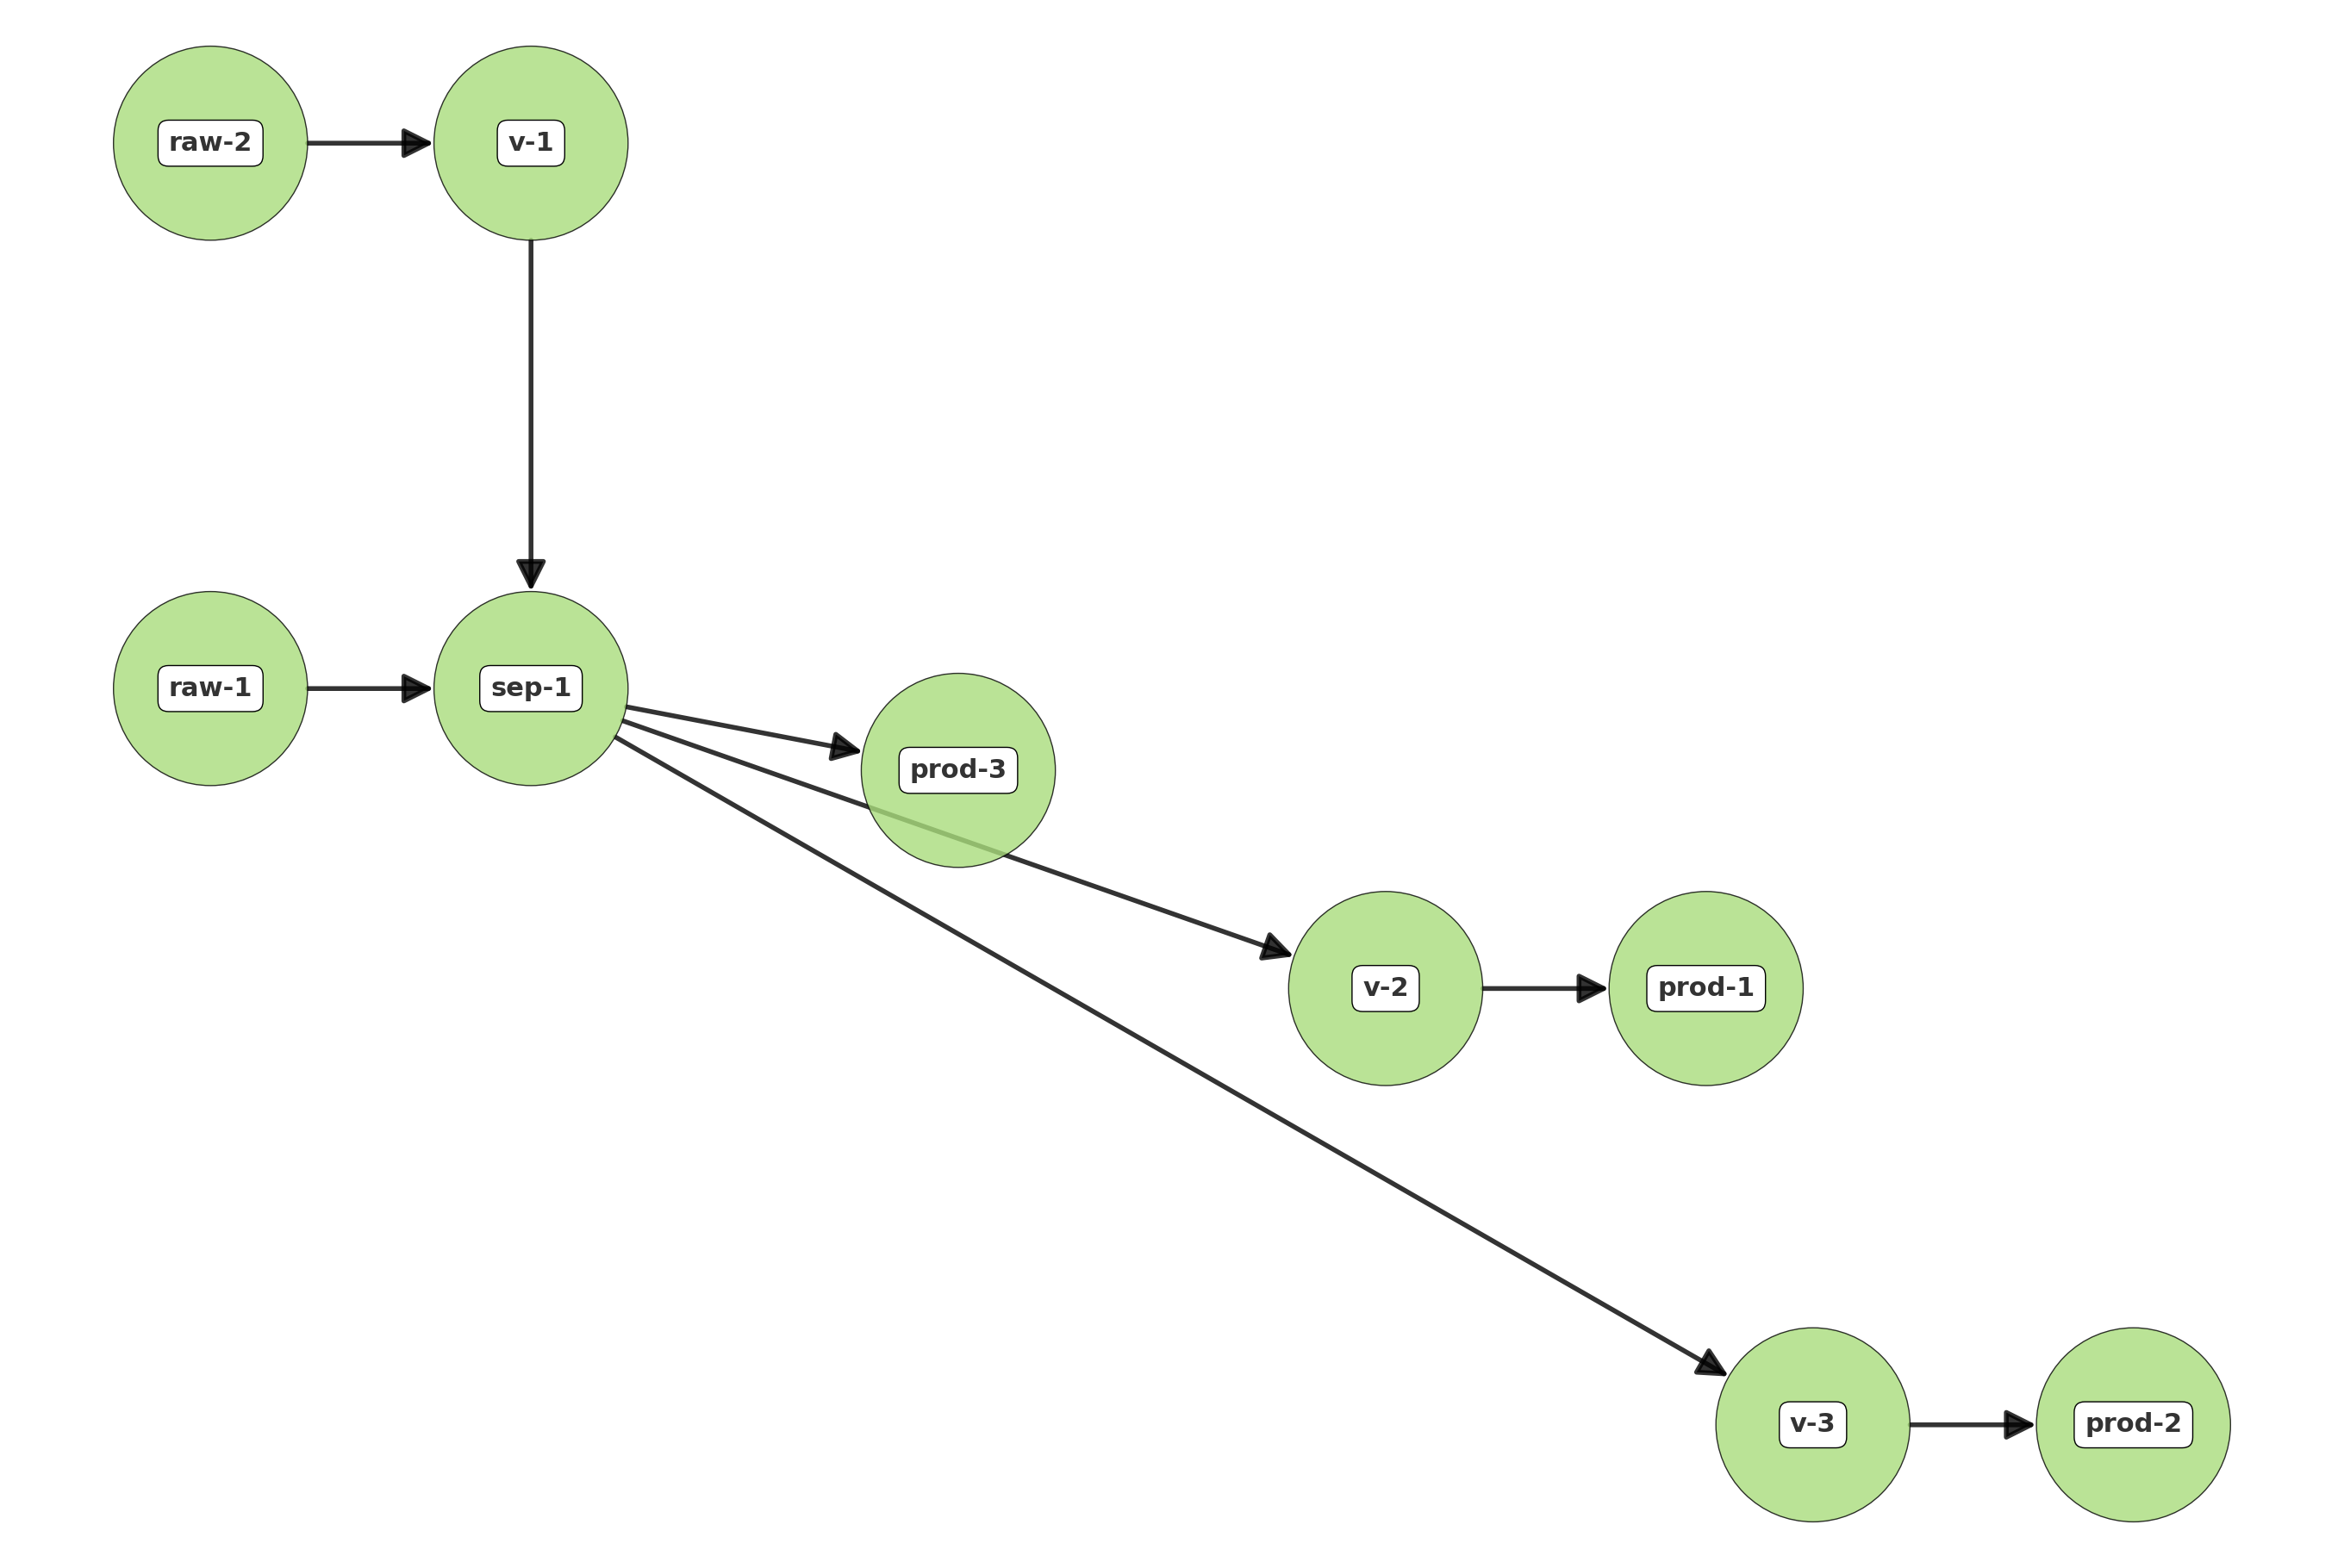

SFILE : (raw)(v)(sep)<&|(raw)&|[(prod)][(v)(prod)](v)(prod)
Conversion from SFILES to graph and back to SFILES successful!



In [26]:
plotFlowSheet(graph_flash_vessel)
sfiles_generate_validate(graph_flash_vessel)

## PID

In [27]:
import networkx as nx
graph_flash_vessel_1 = nx.DiGraph()
graph_flash_vessel_1.add_edges_from([
   ("raw-1","sep-1"),
   ("raw-2","v-1"),
    ("v-1","sep-1"),
    ("sep-1","v-2"),
    ("sep-1","v-3"),
    ("sep-1","prod-3"),
    ("sep-1","C-1/PC"),
    ("sep-1","C-2/LC"),
    ("sep-1","C-4/TC"),
    ("C-2/LC","v-3",{"tags":{"signal": ["not_next_unitop"]}}),
    ("C-1/PC","v-2",{"tags":{"signal": ["not_next_unitop"]}}),
    ("v-2","prod-1"),
    ("v-3","C-3/AC"),
    ("C-3/AC","prod-2",{"tags":{"signal": ["next_unitop"]}}),
    ("C-3/AC","C-4/TC",{"tags":{"signal": ["not_next_unitop"]}}),
    ("C-4/TC","v-1",{"tags":{"signal": ["next_unitop"]}})
    
])

Number of unit operations = 10
Number of controllers = 3
Number of indicators = 0 
Number of transmitters = 0


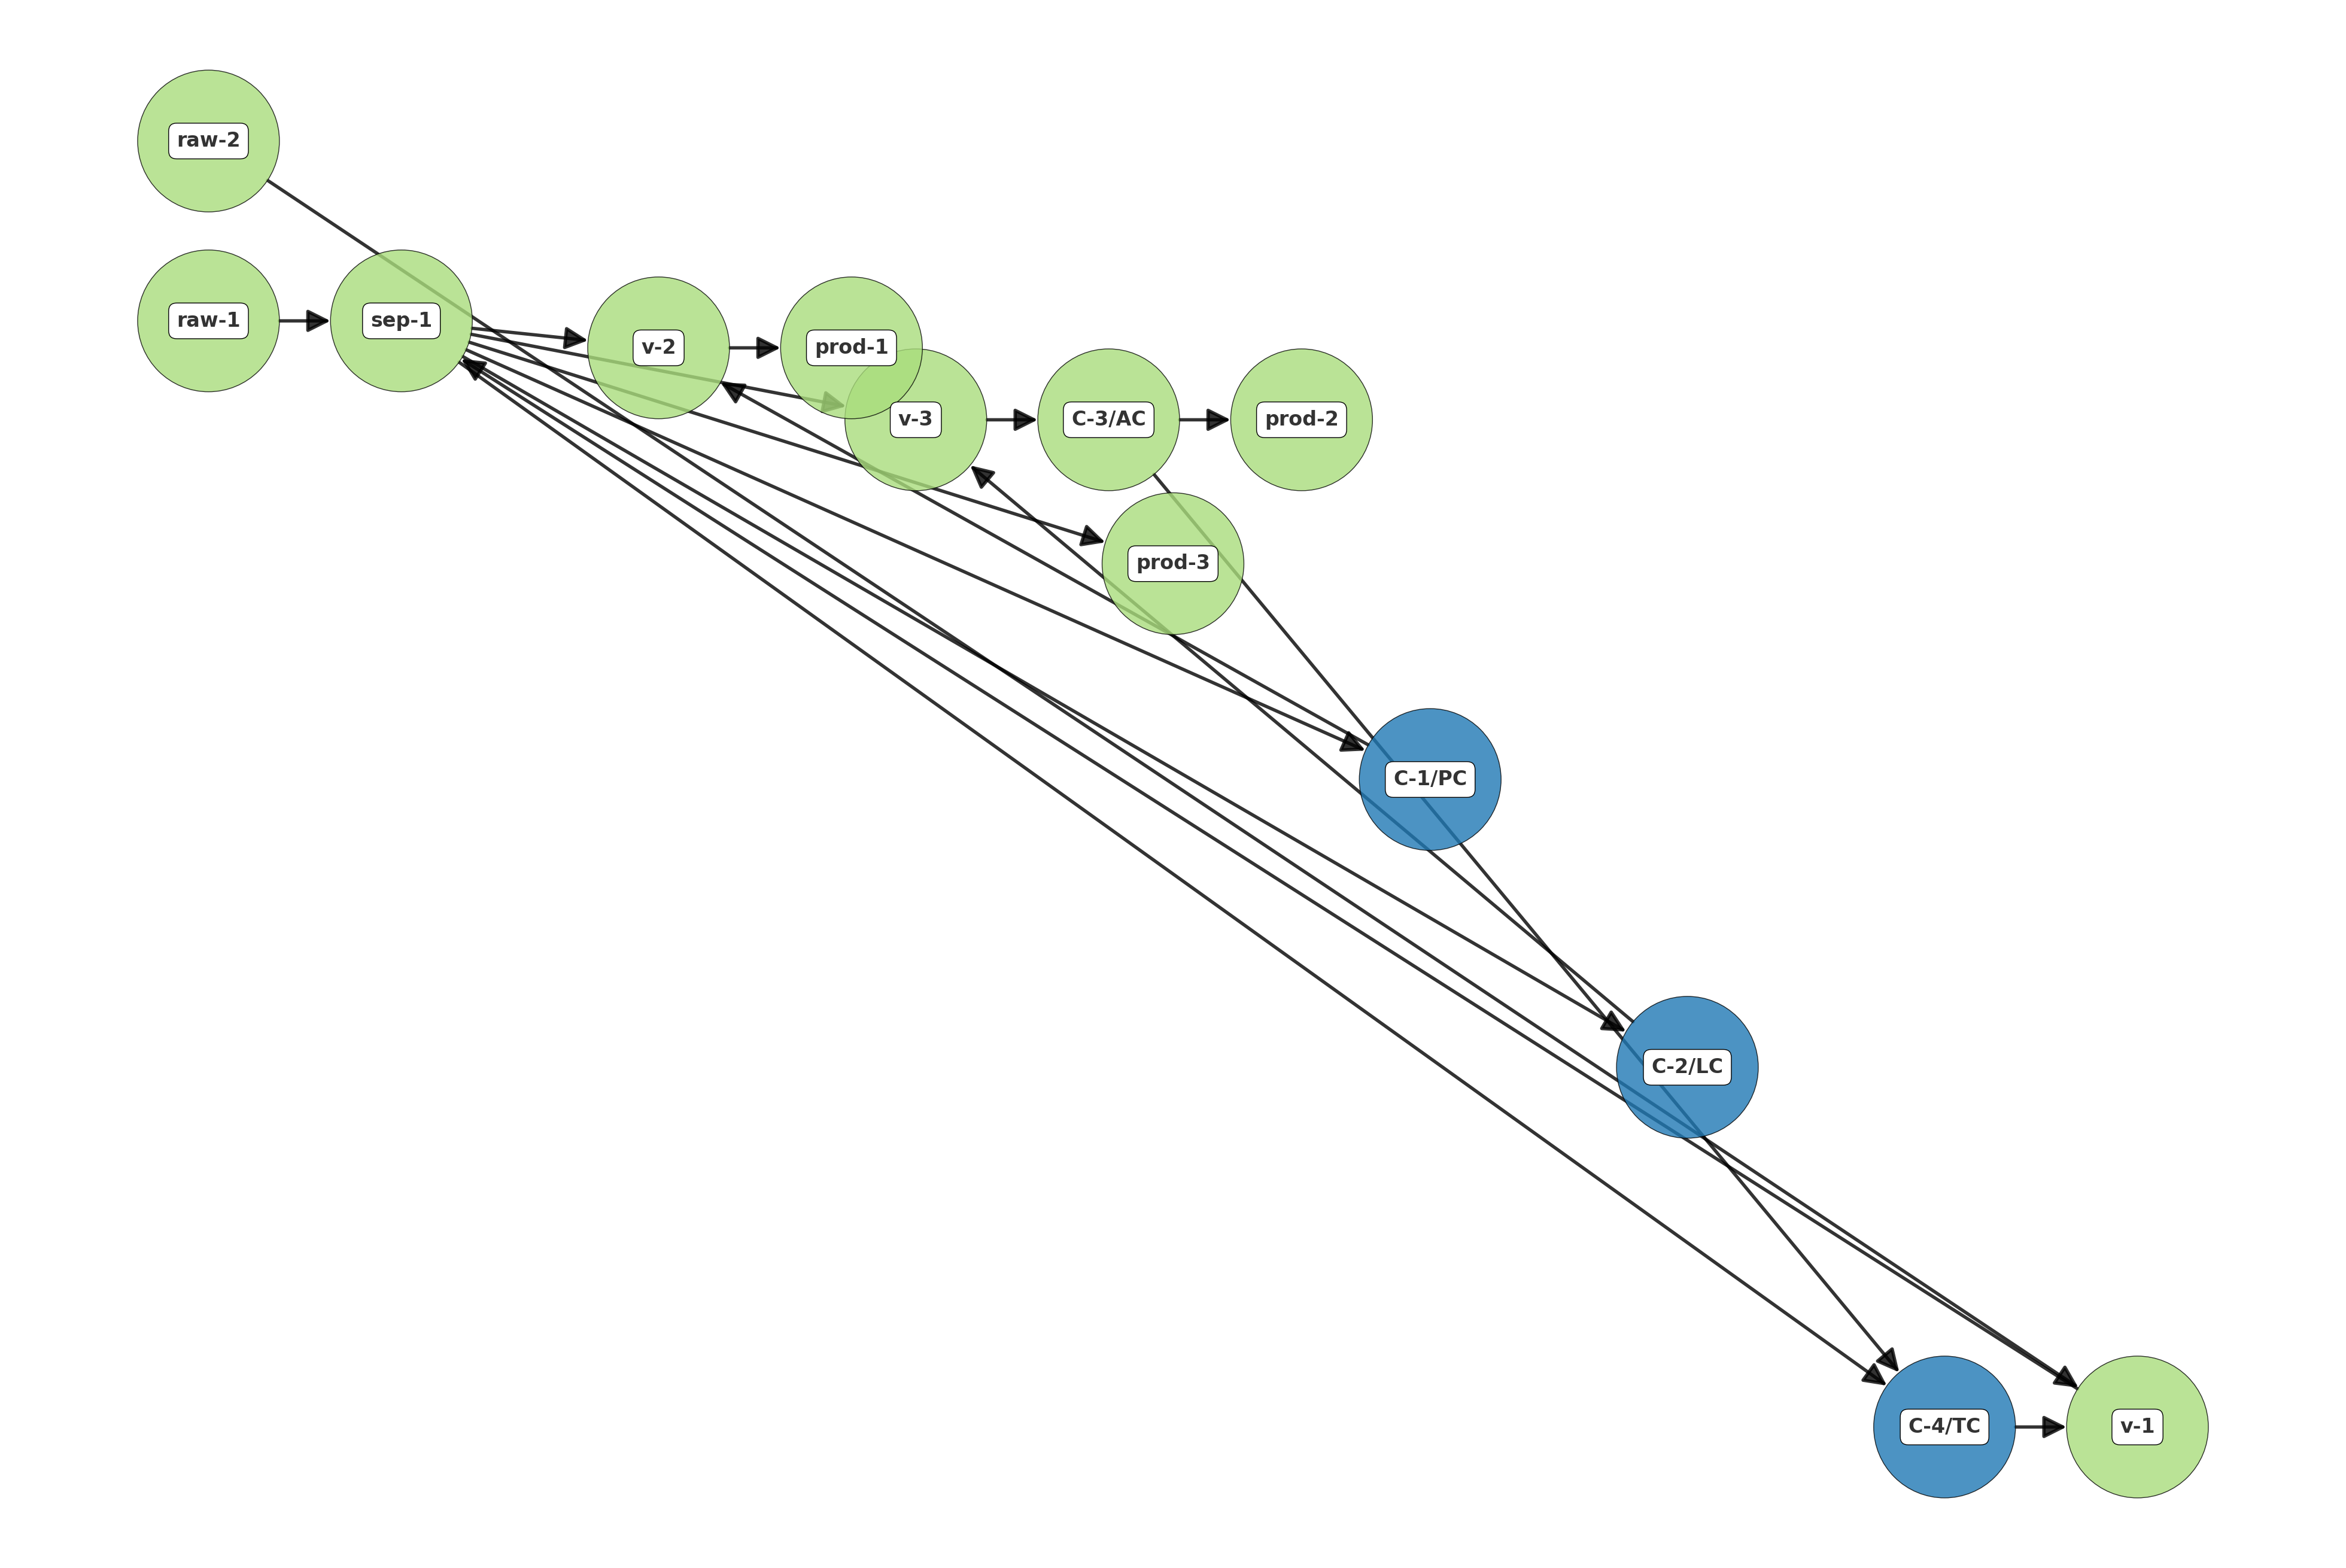

SFILE : (raw)(v)<1<_5(sep)<&|(raw)&|[(C){PC}_1][(C){LC}_2][(prod)][(v)<_1(prod)][(v)<_2(C){AC}_3_4(prod)<_3](C){TC}1_5<_4
Conversion from SFILES to graph and back to SFILES successful!



In [28]:
plotFlowSheet(graph_flash_vessel_1)
sfiles_generate_validate(graph_flash_vessel_1)

# 5. Distillation Column

In [29]:
import networkx as nx
graph_dist = nx.DiGraph()
graph_dist.add_edges_from([
    ("raw-1","dist-1"),
    ("dist-1","hex-1",{"tag" : "tout"}),
    ("hex-1","prod-1"),
    ("raw-2","hex-1"),
    ("hex-1","tank-1"),
    ("tank-1","splt-1"),
    ("splt-1","v-1"),
    ("v-1","dist-1"),
    ("splt-1","v-2"),
    ("v-2","prod-2"),
    ("dist-1","splt-2",{"tag" : "bout"}),
    ("splt-2","hex-2"),
    ("hex-2","dist-1"),
    ("hex-2","prod-3"),
    ("raw-3","v-3"),
    ("v-3","hex-2"),
    ("splt-2","v-4"),
    ("v-4","prod-4")
])

Number of unit operations = 17
Number of controllers = 0
Number of indicators = 0 
Number of transmitters = 0


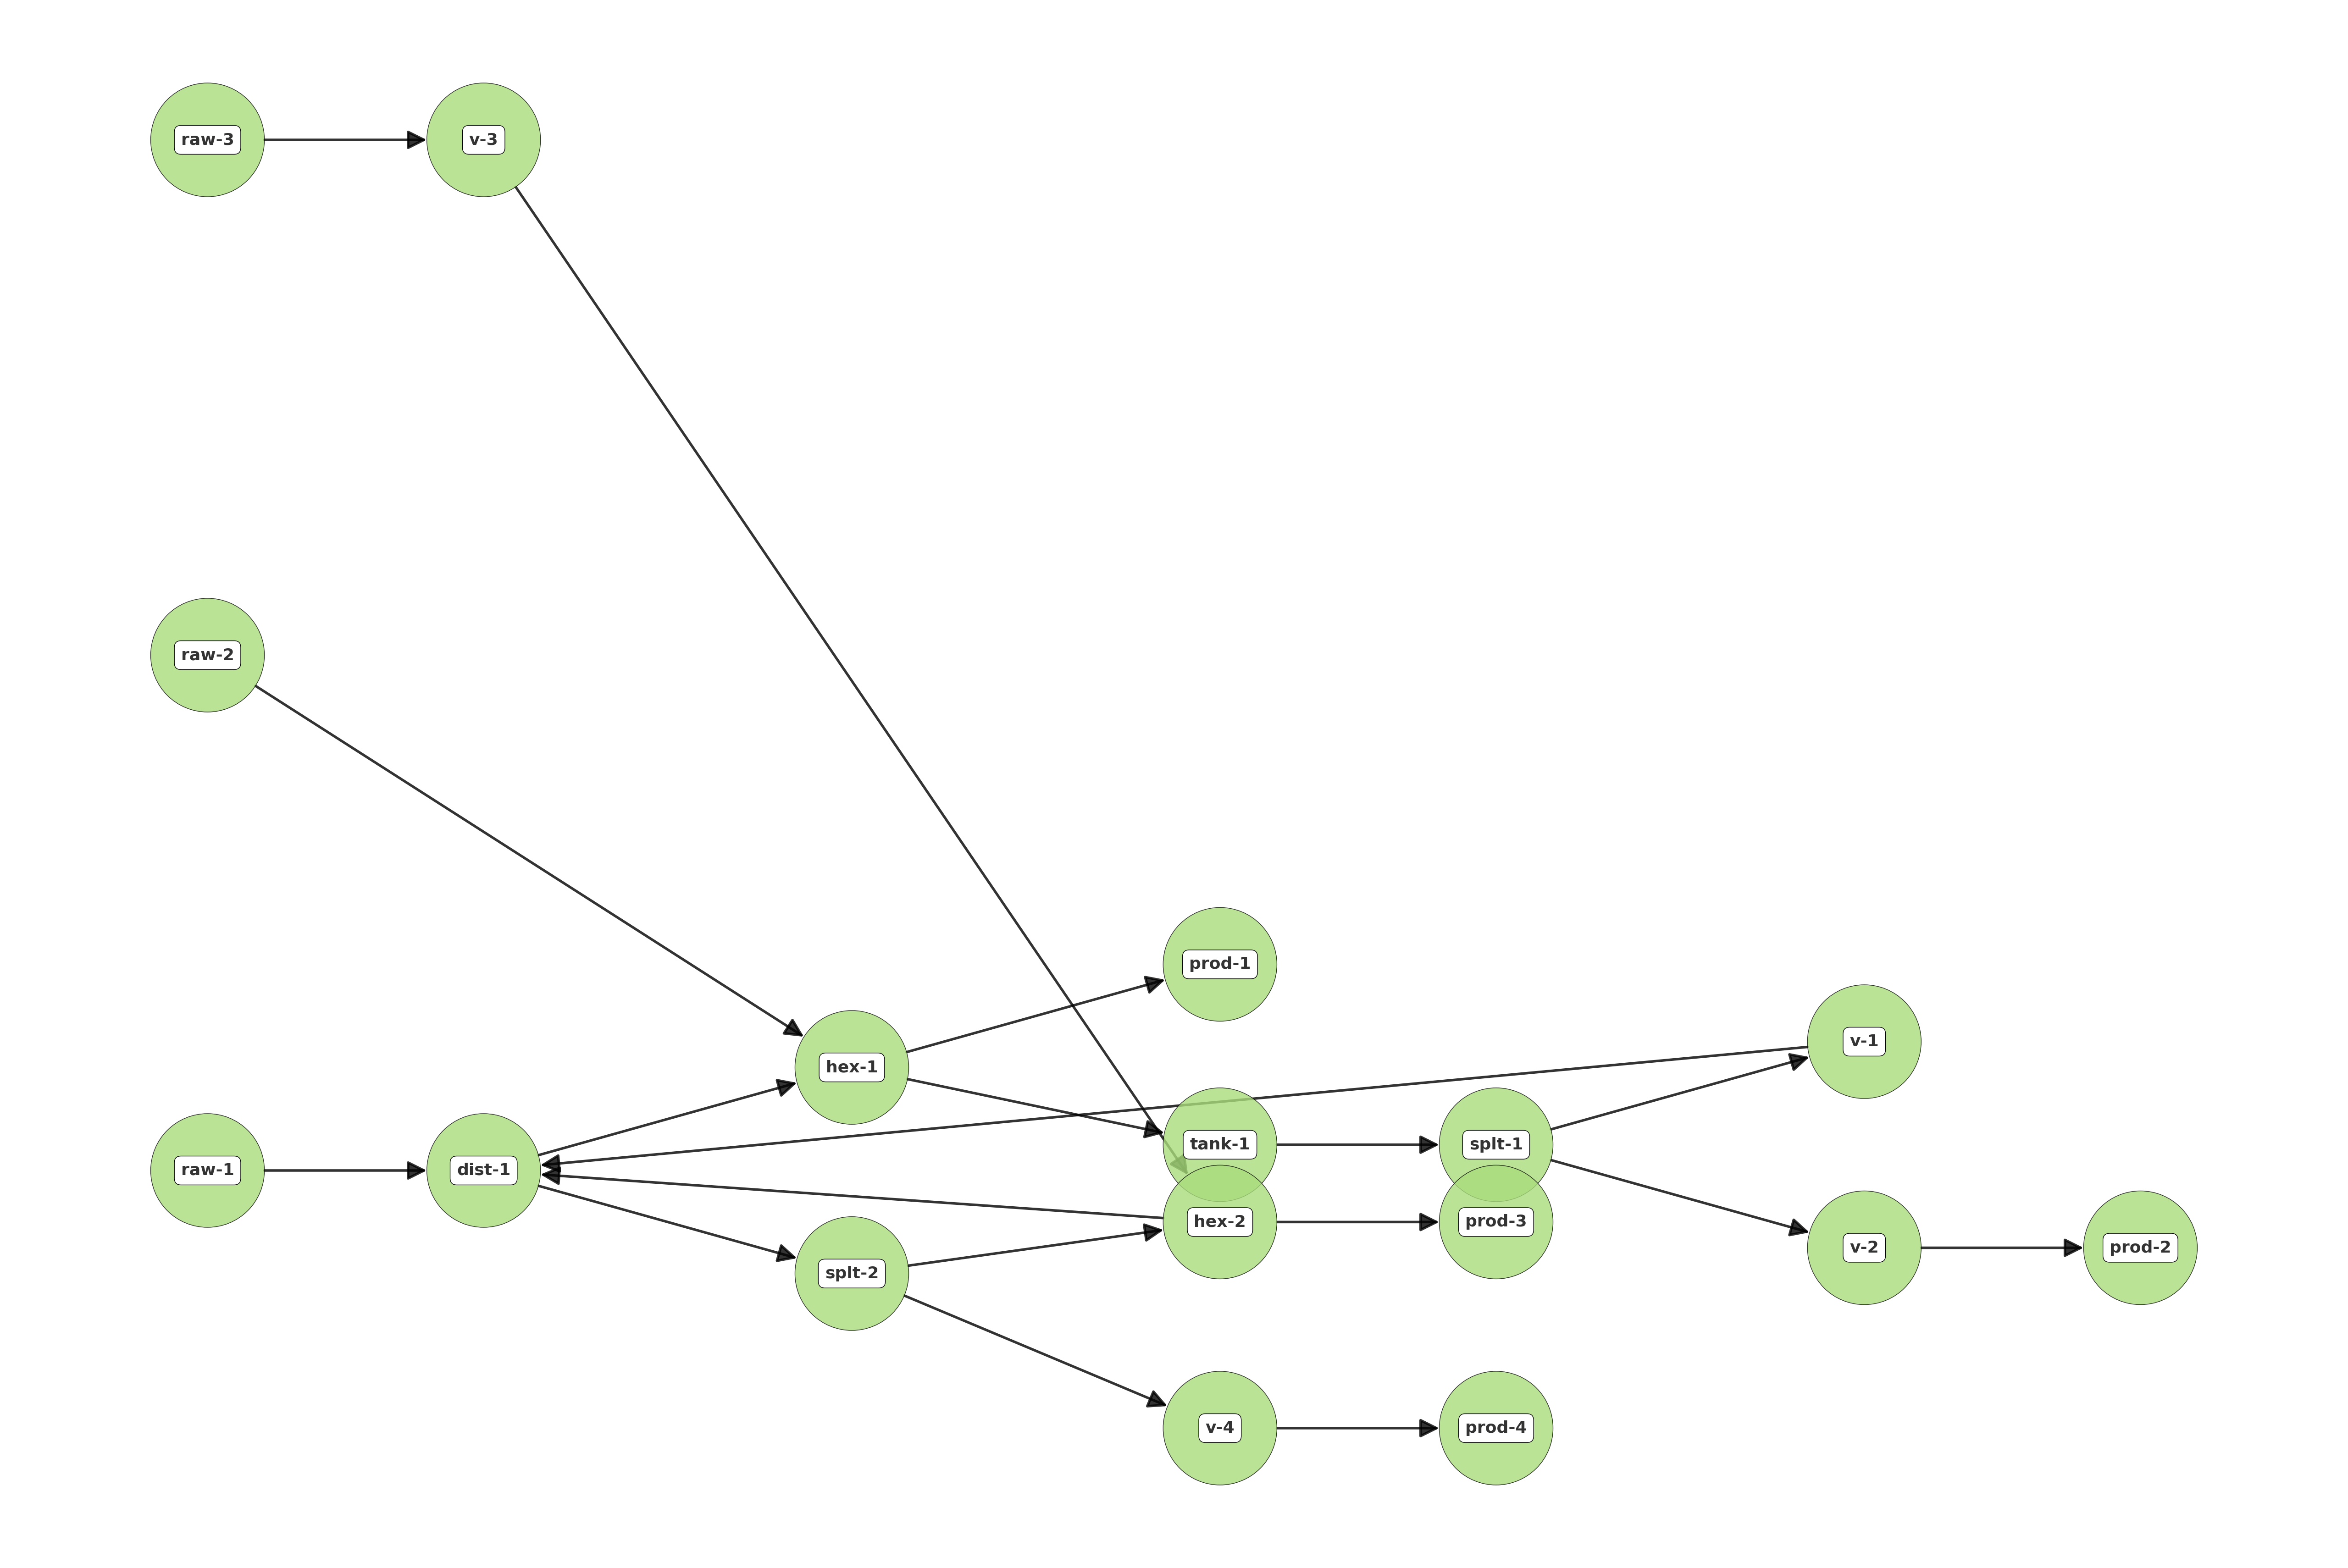

SFILE : (raw)(v)(hex)<2[(prod)](dist)<1<&|(raw)&|[(hex)<&|(raw)&|[(prod)](tank)(splt)[(v)(prod)](v)1](splt)2(v)(prod)
Conversion from SFILES to graph and back to SFILES successful!



In [30]:
plotFlowSheet(graph_dist)
sfiles_generate_validate(graph_dist)

In [31]:
import networkx as nx
graph_dist_1 = nx.DiGraph()
graph_dist_1.add_edges_from([
    ("raw-1","dist-1"),
    ("dist-1","hex-1",{"tag" : "tout"}),
    ("dist-1","C-1/PC"),
    ("C-1/PC","hex-1",{"tags":{"signal": ["not_next_unitop"]}}),
    ("hex-1","prod-1"),
    ("raw-2","hex-1"),
    ("hex-1","tank-1"),
    ("tank-1","splt-1"),
    ("tank-1","C-2/LC"),
    ("C-2/LC","v-2",{"tags":{"signal": ["not_next_unitop"]}}),
    ("splt-1","v-1"),
    ("dist-1","C-3/TC"),
    ("C-3/TC","v-1",{"tags":{"signal": ["not_next_unitop"]}}),
    ("dist-1","C-4/TC"),
    ("C-4/TC","v-3",{"tags":{"signal": ["not_next_unitop"]}}),
    ("v-1","dist-1"),
    ("splt-1","v-2"),
    ("v-2","prod-2"),
    ("dist-1","splt-2",{"tag" : "bout"}),
    ("dist-1","C-5/LC"),
    ("C-5/LC","v-4",{"tags":{"signal": ["not_next_unitop"]}}),
    ("splt-2","hex-2"),
    ("hex-2","dist-1"),
    ("hex-2","prod-3"),
    ("raw-3","v-3"),
    ("v-3","hex-2"),
    ("splt-2","v-4"),
    ("v-4","prod-4") 
])

Number of unit operations = 17
Number of controllers = 5
Number of indicators = 0 
Number of transmitters = 0


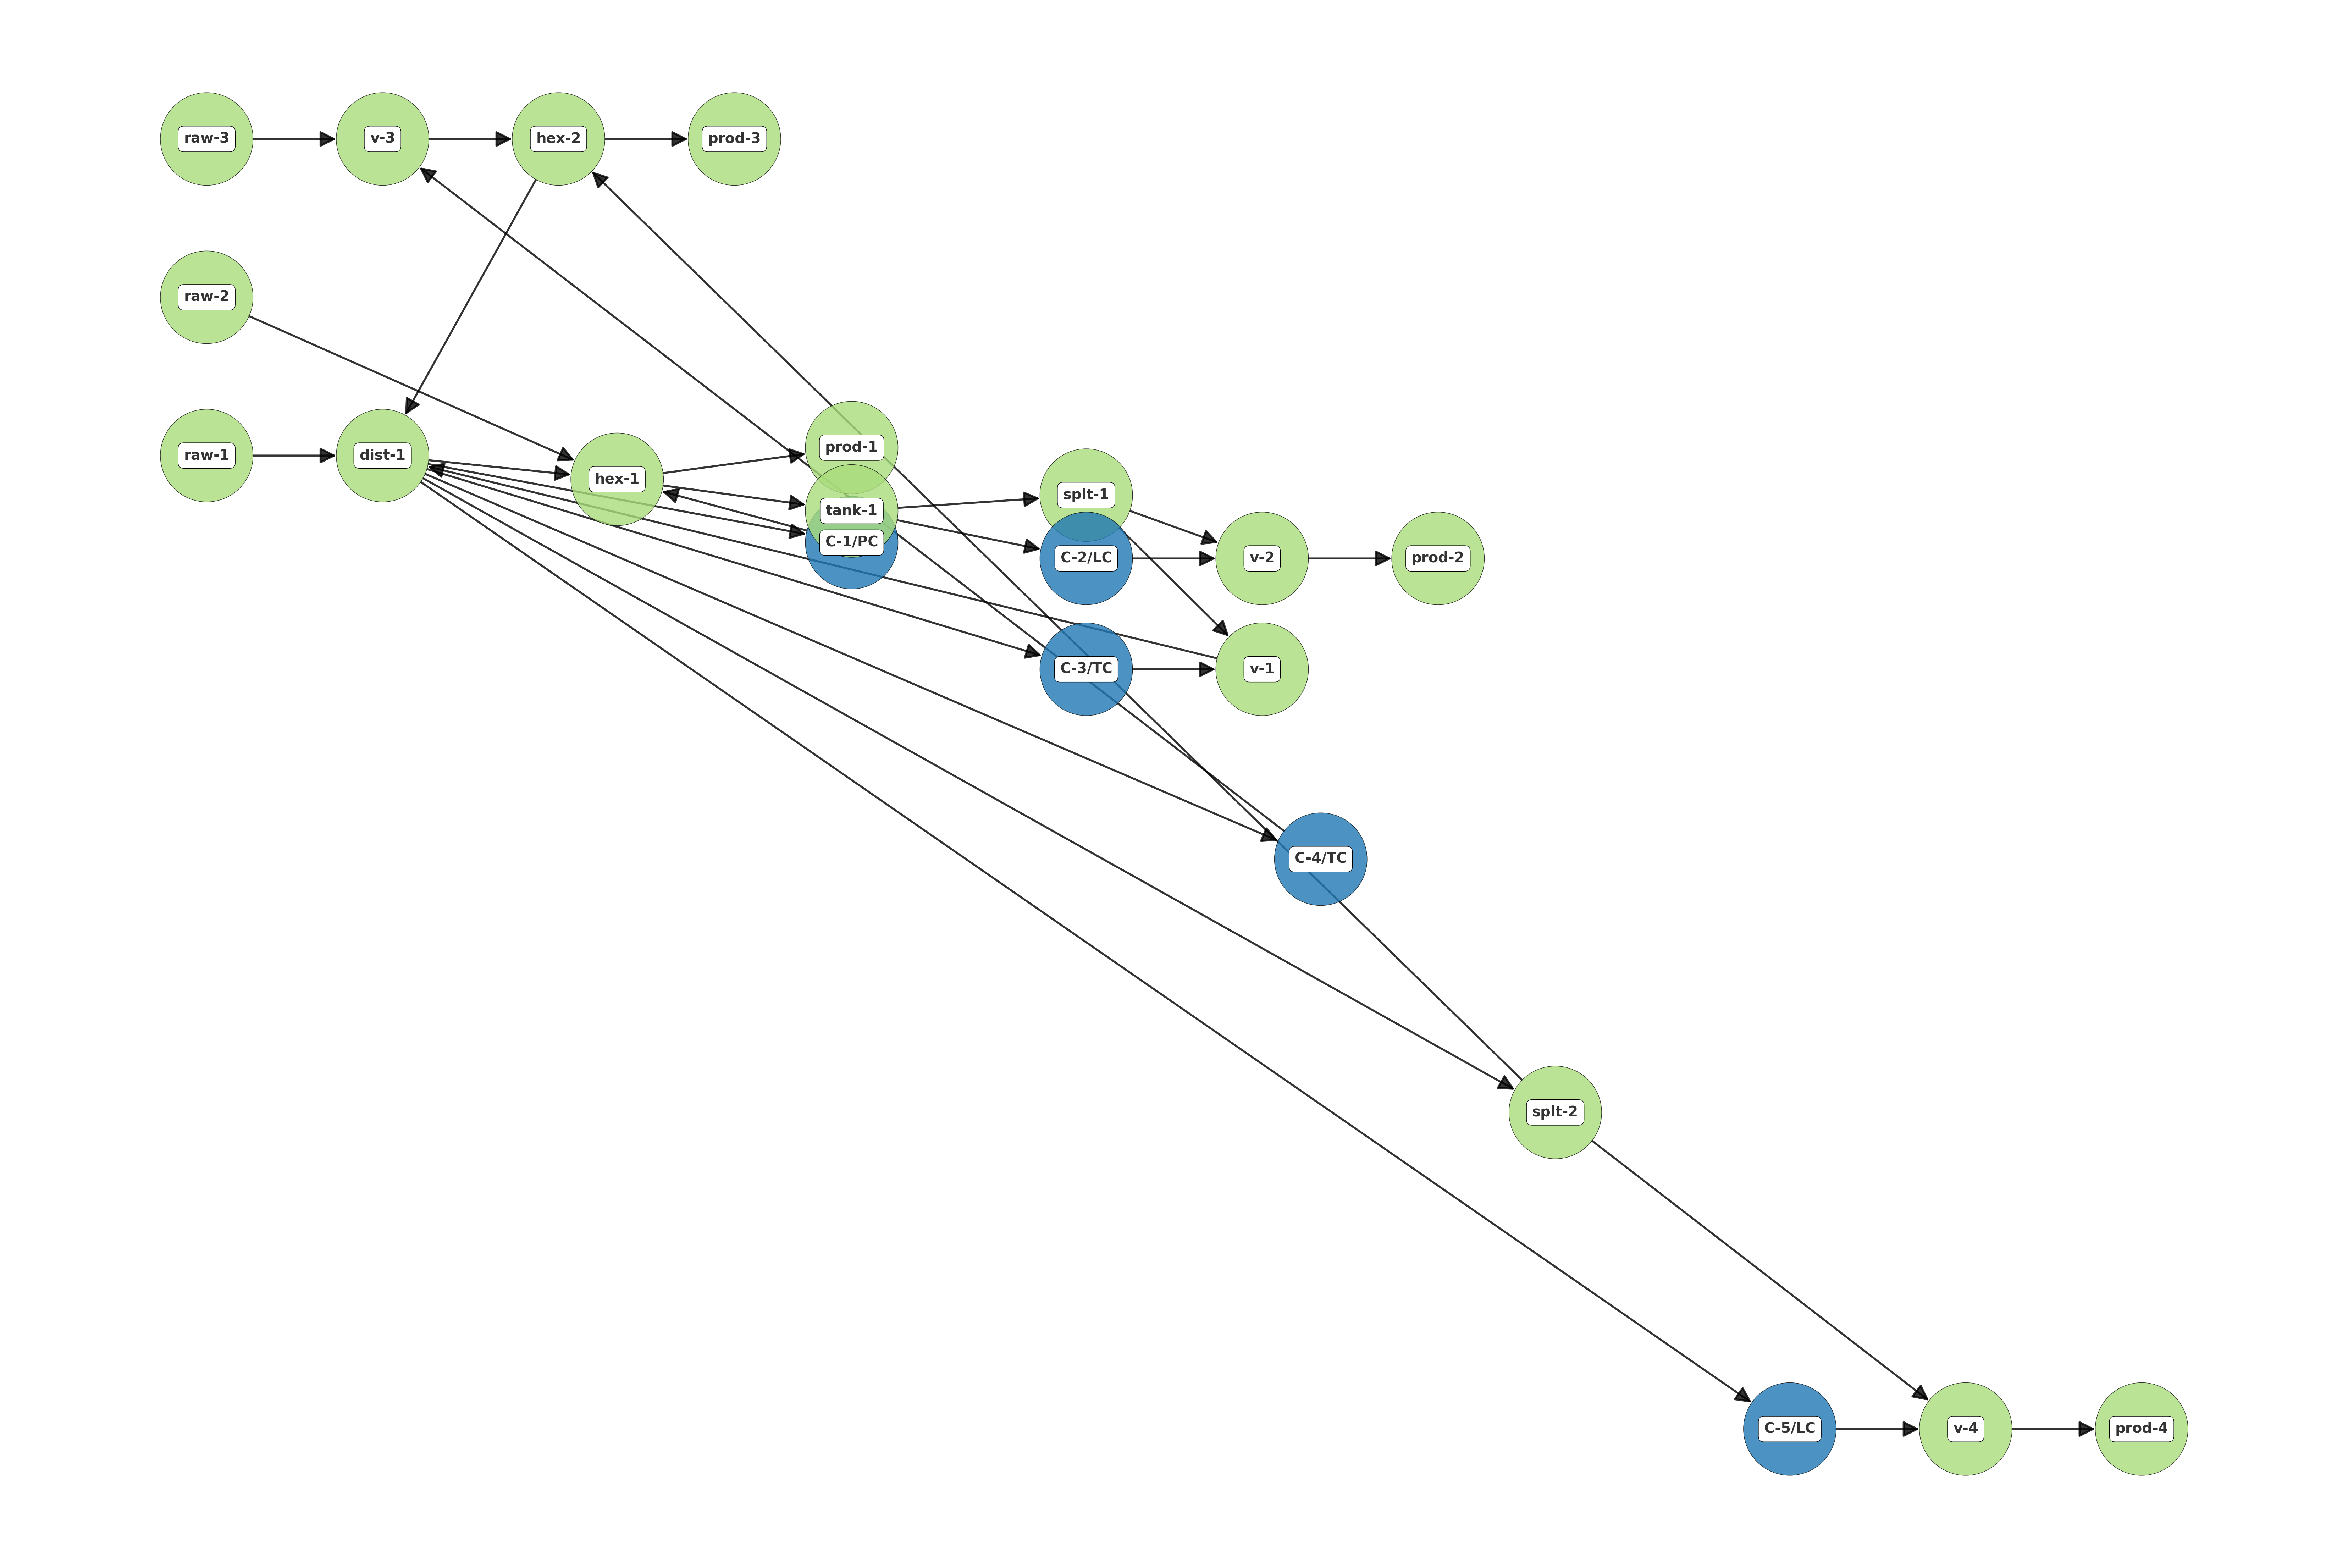

SFILE : (raw)(v)<_3(hex)<2[(prod)](dist)<1<&|(raw)&|[(C){PC}_1][(C){TC}_2][(C){TC}_3][(C){LC}_4][(hex)<_1<&|(raw)&|[(prod)](tank)[(C){LC}_5](splt)[(v)<_5(prod)](v)1<_2](splt)2(v)<_4(prod)
Conversion from SFILES to graph and back to SFILES successful!



In [32]:
plotFlowSheet(graph_dist_1)
sfiles_generate_validate(graph_dist_1)

# Control of Compressor

In [33]:
import networkx as nx
graph_comp = nx.DiGraph()
graph_comp.add_edges_from([
    ("raw-1","mix-1"),
    ("mix-1","comp-1"),
    ("comp-1","splt-1"),
    ("splt-1","v-1"),
    ("v-1","mix-1"),
    ("splt-1","splt-2"),
    ("splt-2","v-2"),
    ("v-2","prod-2"),
    ("splt-2","prod-1")
])

Number of unit operations = 9
Number of controllers = 0
Number of indicators = 0 
Number of transmitters = 0


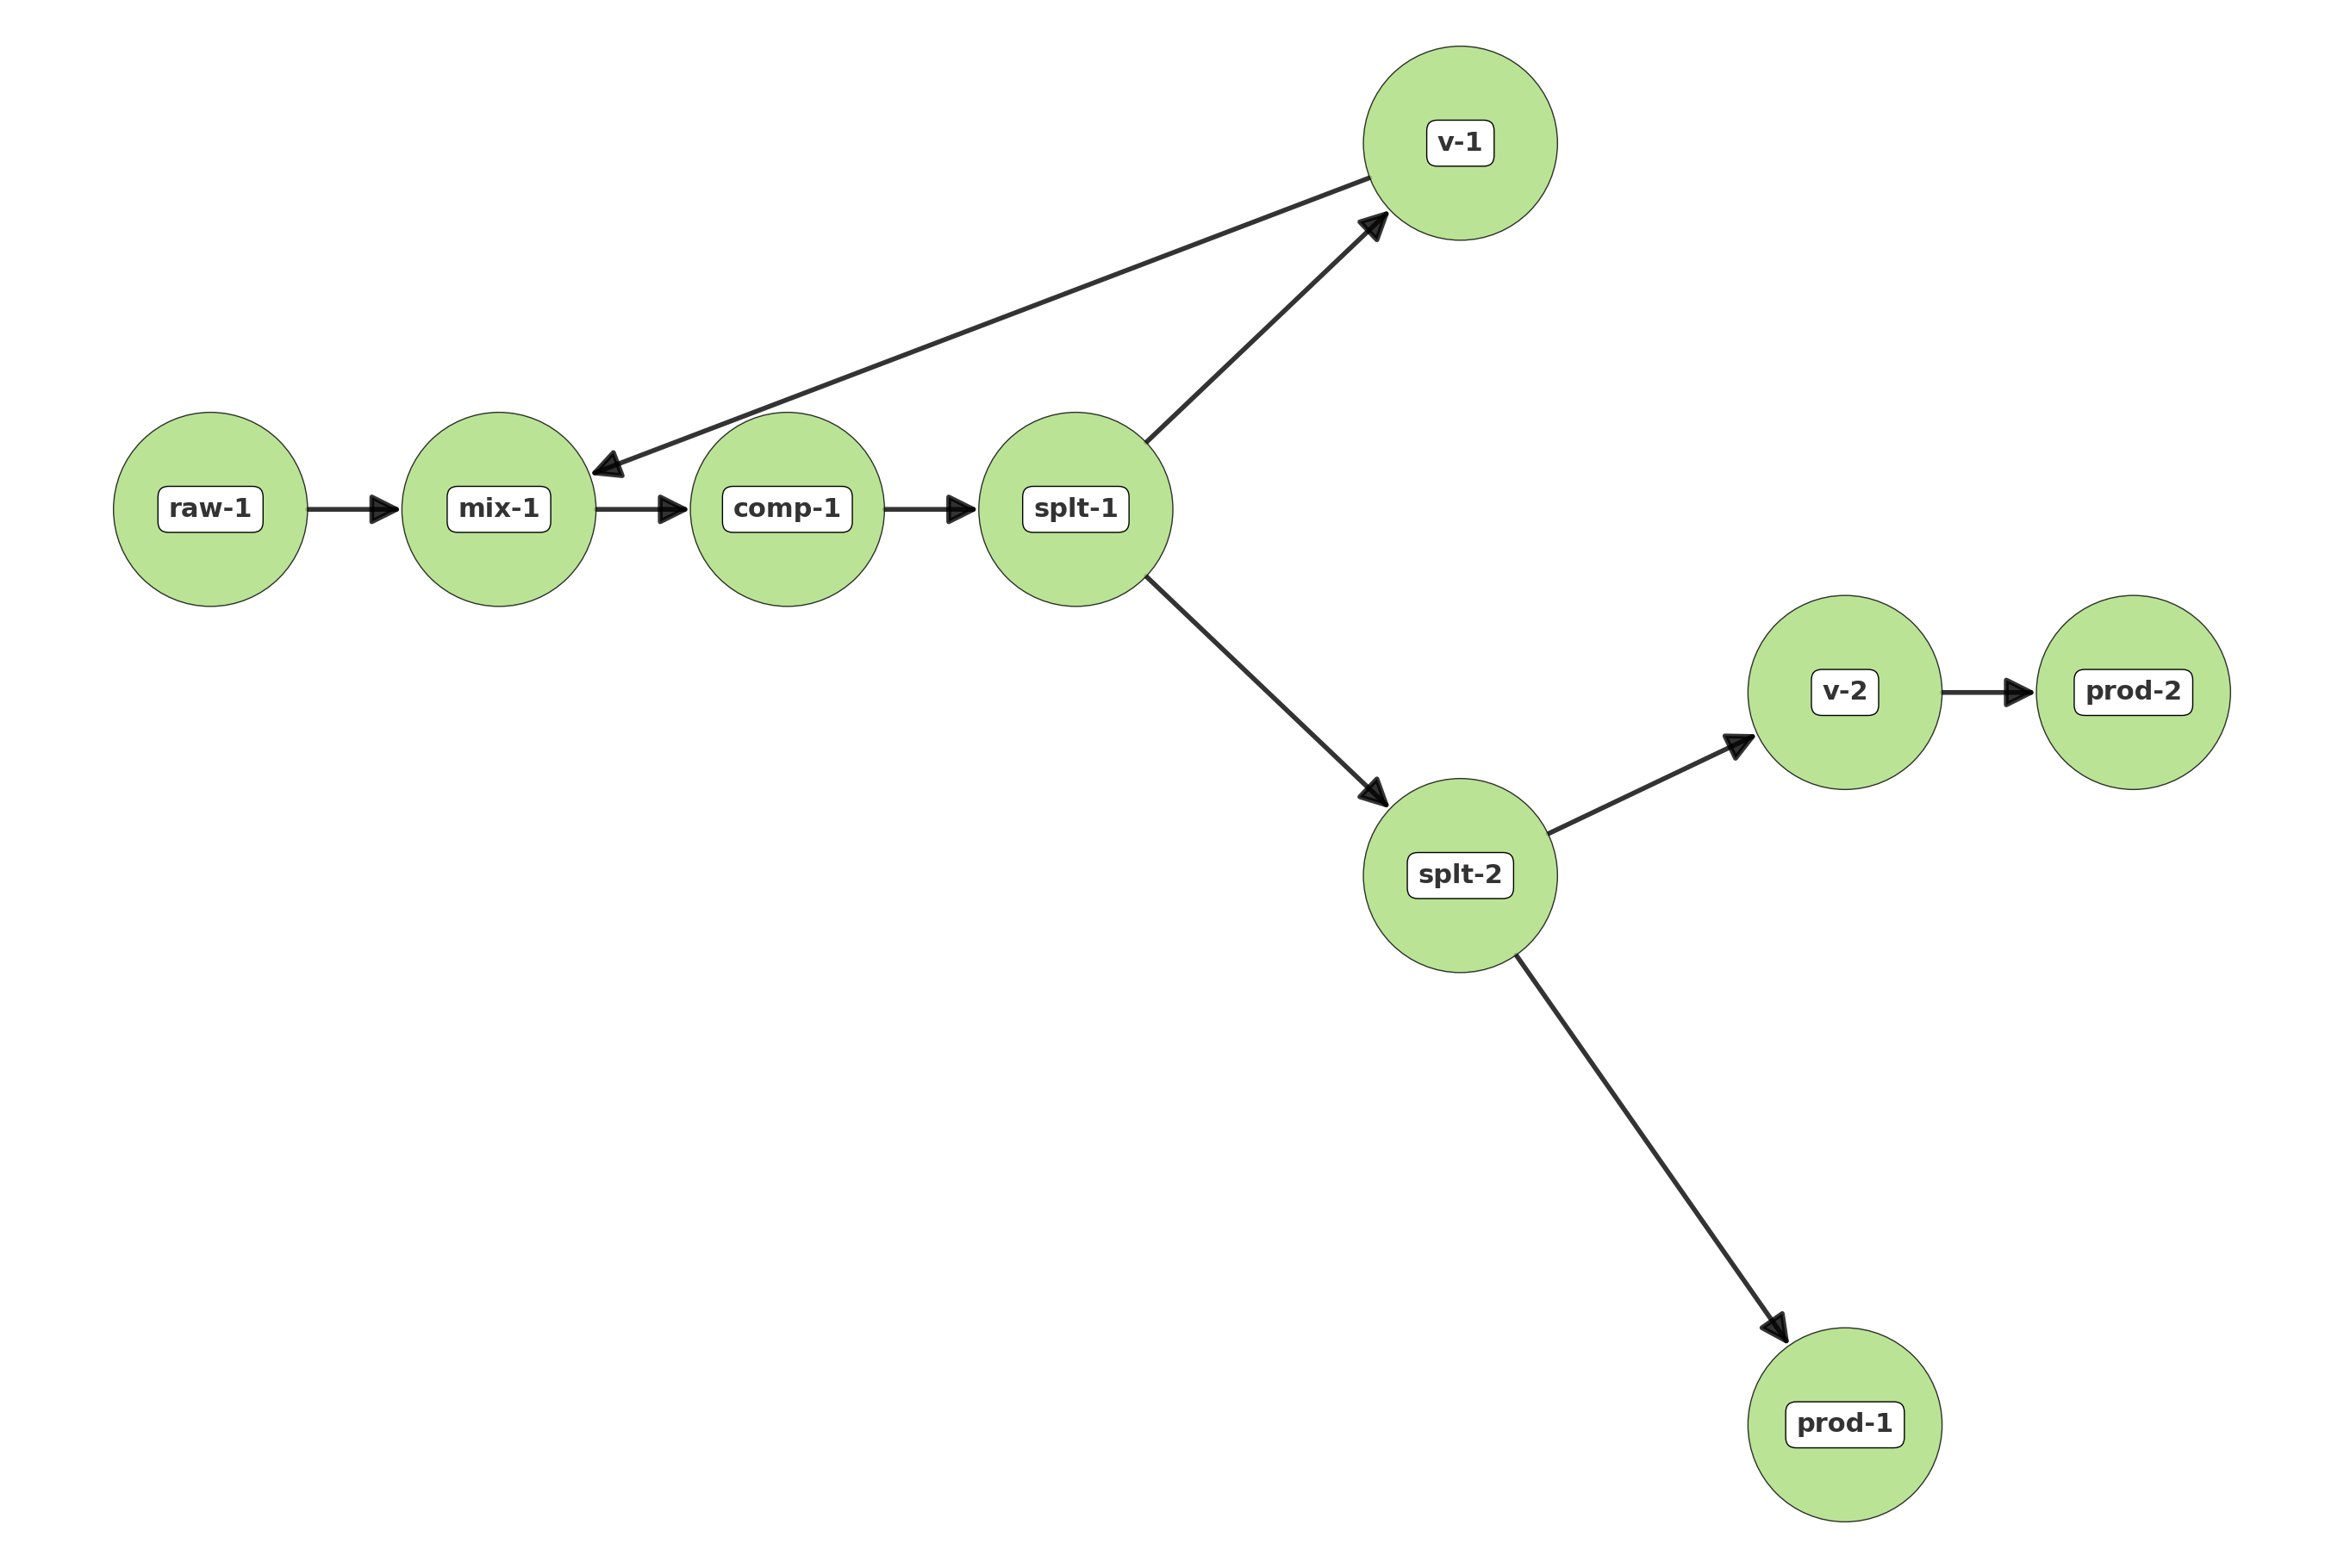

SFILE : (raw)(mix)<1(comp)(splt)[(v)1](splt)[(prod)](v)(prod)
Conversion from SFILES to graph and back to SFILES successful!



In [34]:
plotFlowSheet(graph_comp)
sfiles_generate_validate(graph_comp)

In [35]:
graph_comp_1 = nx.DiGraph()
graph_comp_1.add_edges_from([
    ("raw-1","mix-1"),
    ("mix-1","comp-1"),
    ("comp-1","splt-1"),
    ("splt-1","v-1"),
    ("v-1","mix-1"),
    ("splt-1","splt-2"),
    ("splt-2","v-2"),
    ("splt-2","C-1/UC"),
    ("C-1/UC","C-2/PC"),
    ("C-1/UC","v-1",{"tags":{"signal": ["not_next_unitop"]}}),
    ("C-2/PC","prod-1"),
    ("C-2/PC","v-2",{"tags":{"signal": ["not_next_unitop"]}}),
    ("C-2/PC","comp-1",{"tags":{"signal": ["not_next_unitop"]}}),
    ("v-2","prod-2"),
])

Number of unit operations = 10
Number of controllers = 1
Number of indicators = 0 
Number of transmitters = 0


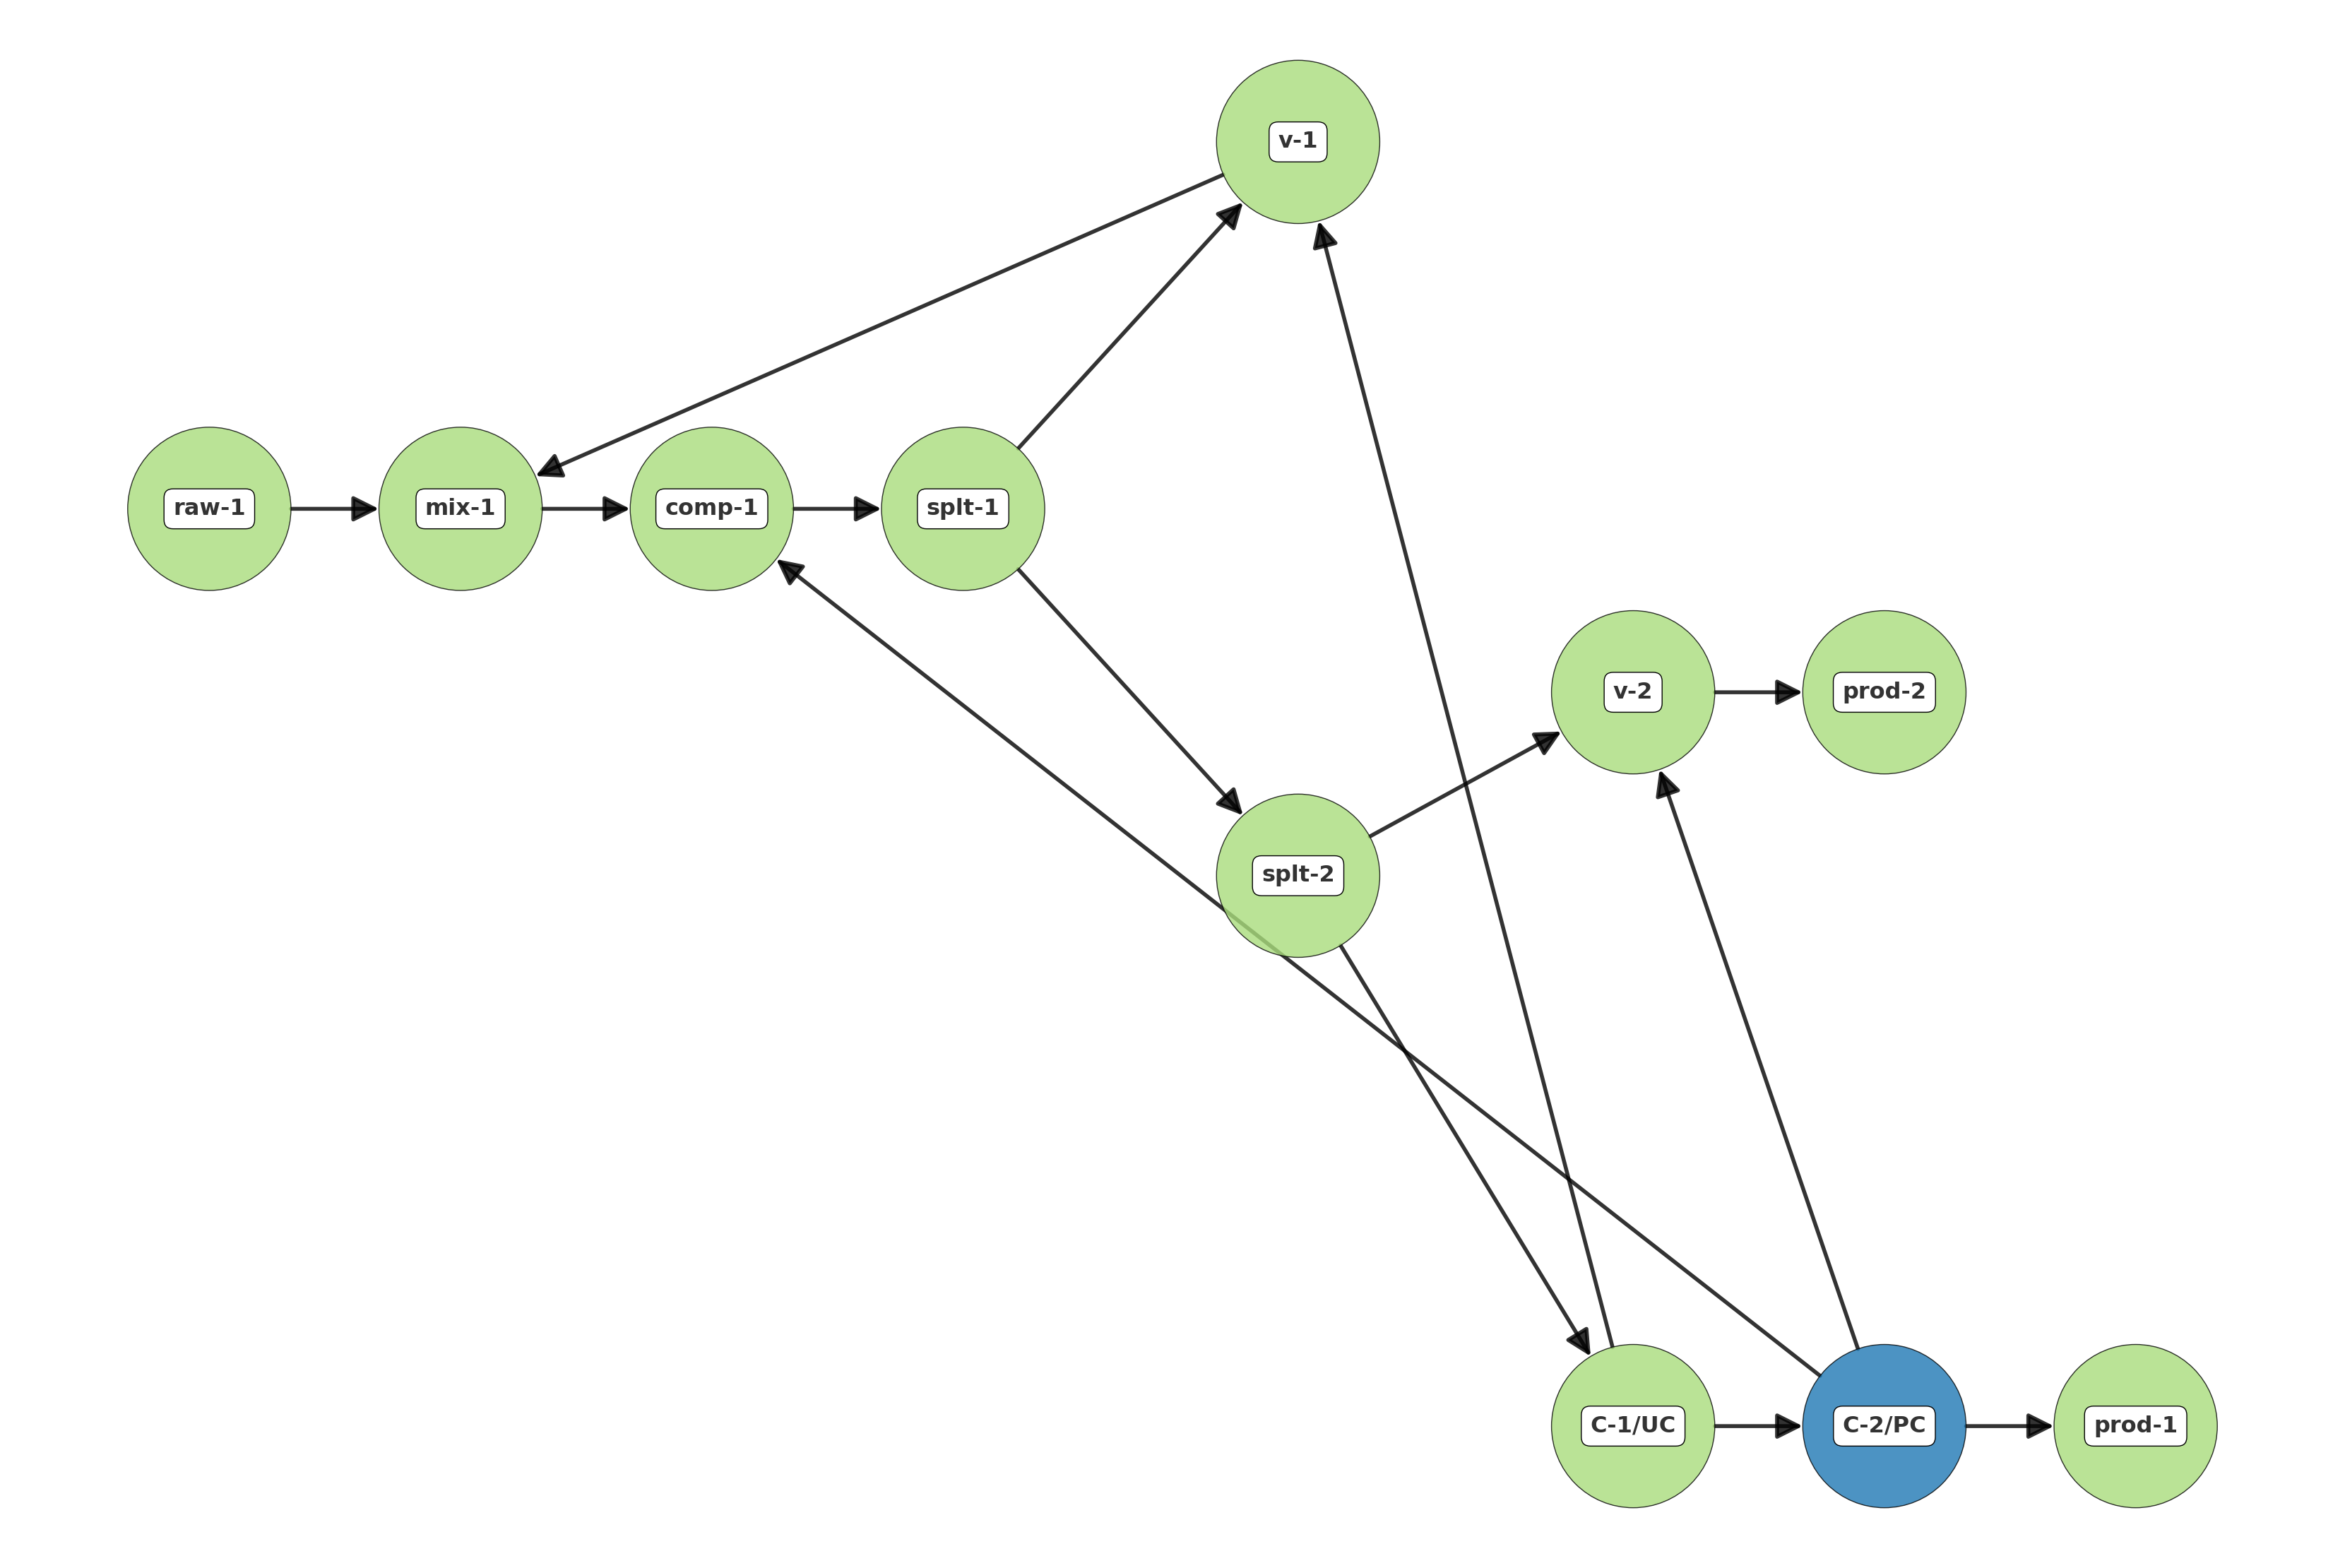

SFILE : (raw)(mix)<1(comp)<_3(splt)[(v)1<_1](splt)[(v)<_2(prod)](C){UC}_1(C){PC}_2_3(prod)
Conversion from SFILES to graph and back to SFILES successful!



In [36]:
plotFlowSheet(graph_comp_1)
sfiles_generate_validate(graph_comp_1)

# Drum Boiler

In [37]:
import networkx as nx
graph_drum = nx.DiGraph()
graph_drum.add_edges_from([
    ("raw-1","v-1"),
    ("v-1","tank-1"),
    ("tank-1","prod-1"),
    ("raw-2","v-2"),
    ("v-2","tank-1"),
    ("tank-1","v-3"),
    ("v-3","prod-2")
])

Number of unit operations = 8
Number of controllers = 0
Number of indicators = 0 
Number of transmitters = 0


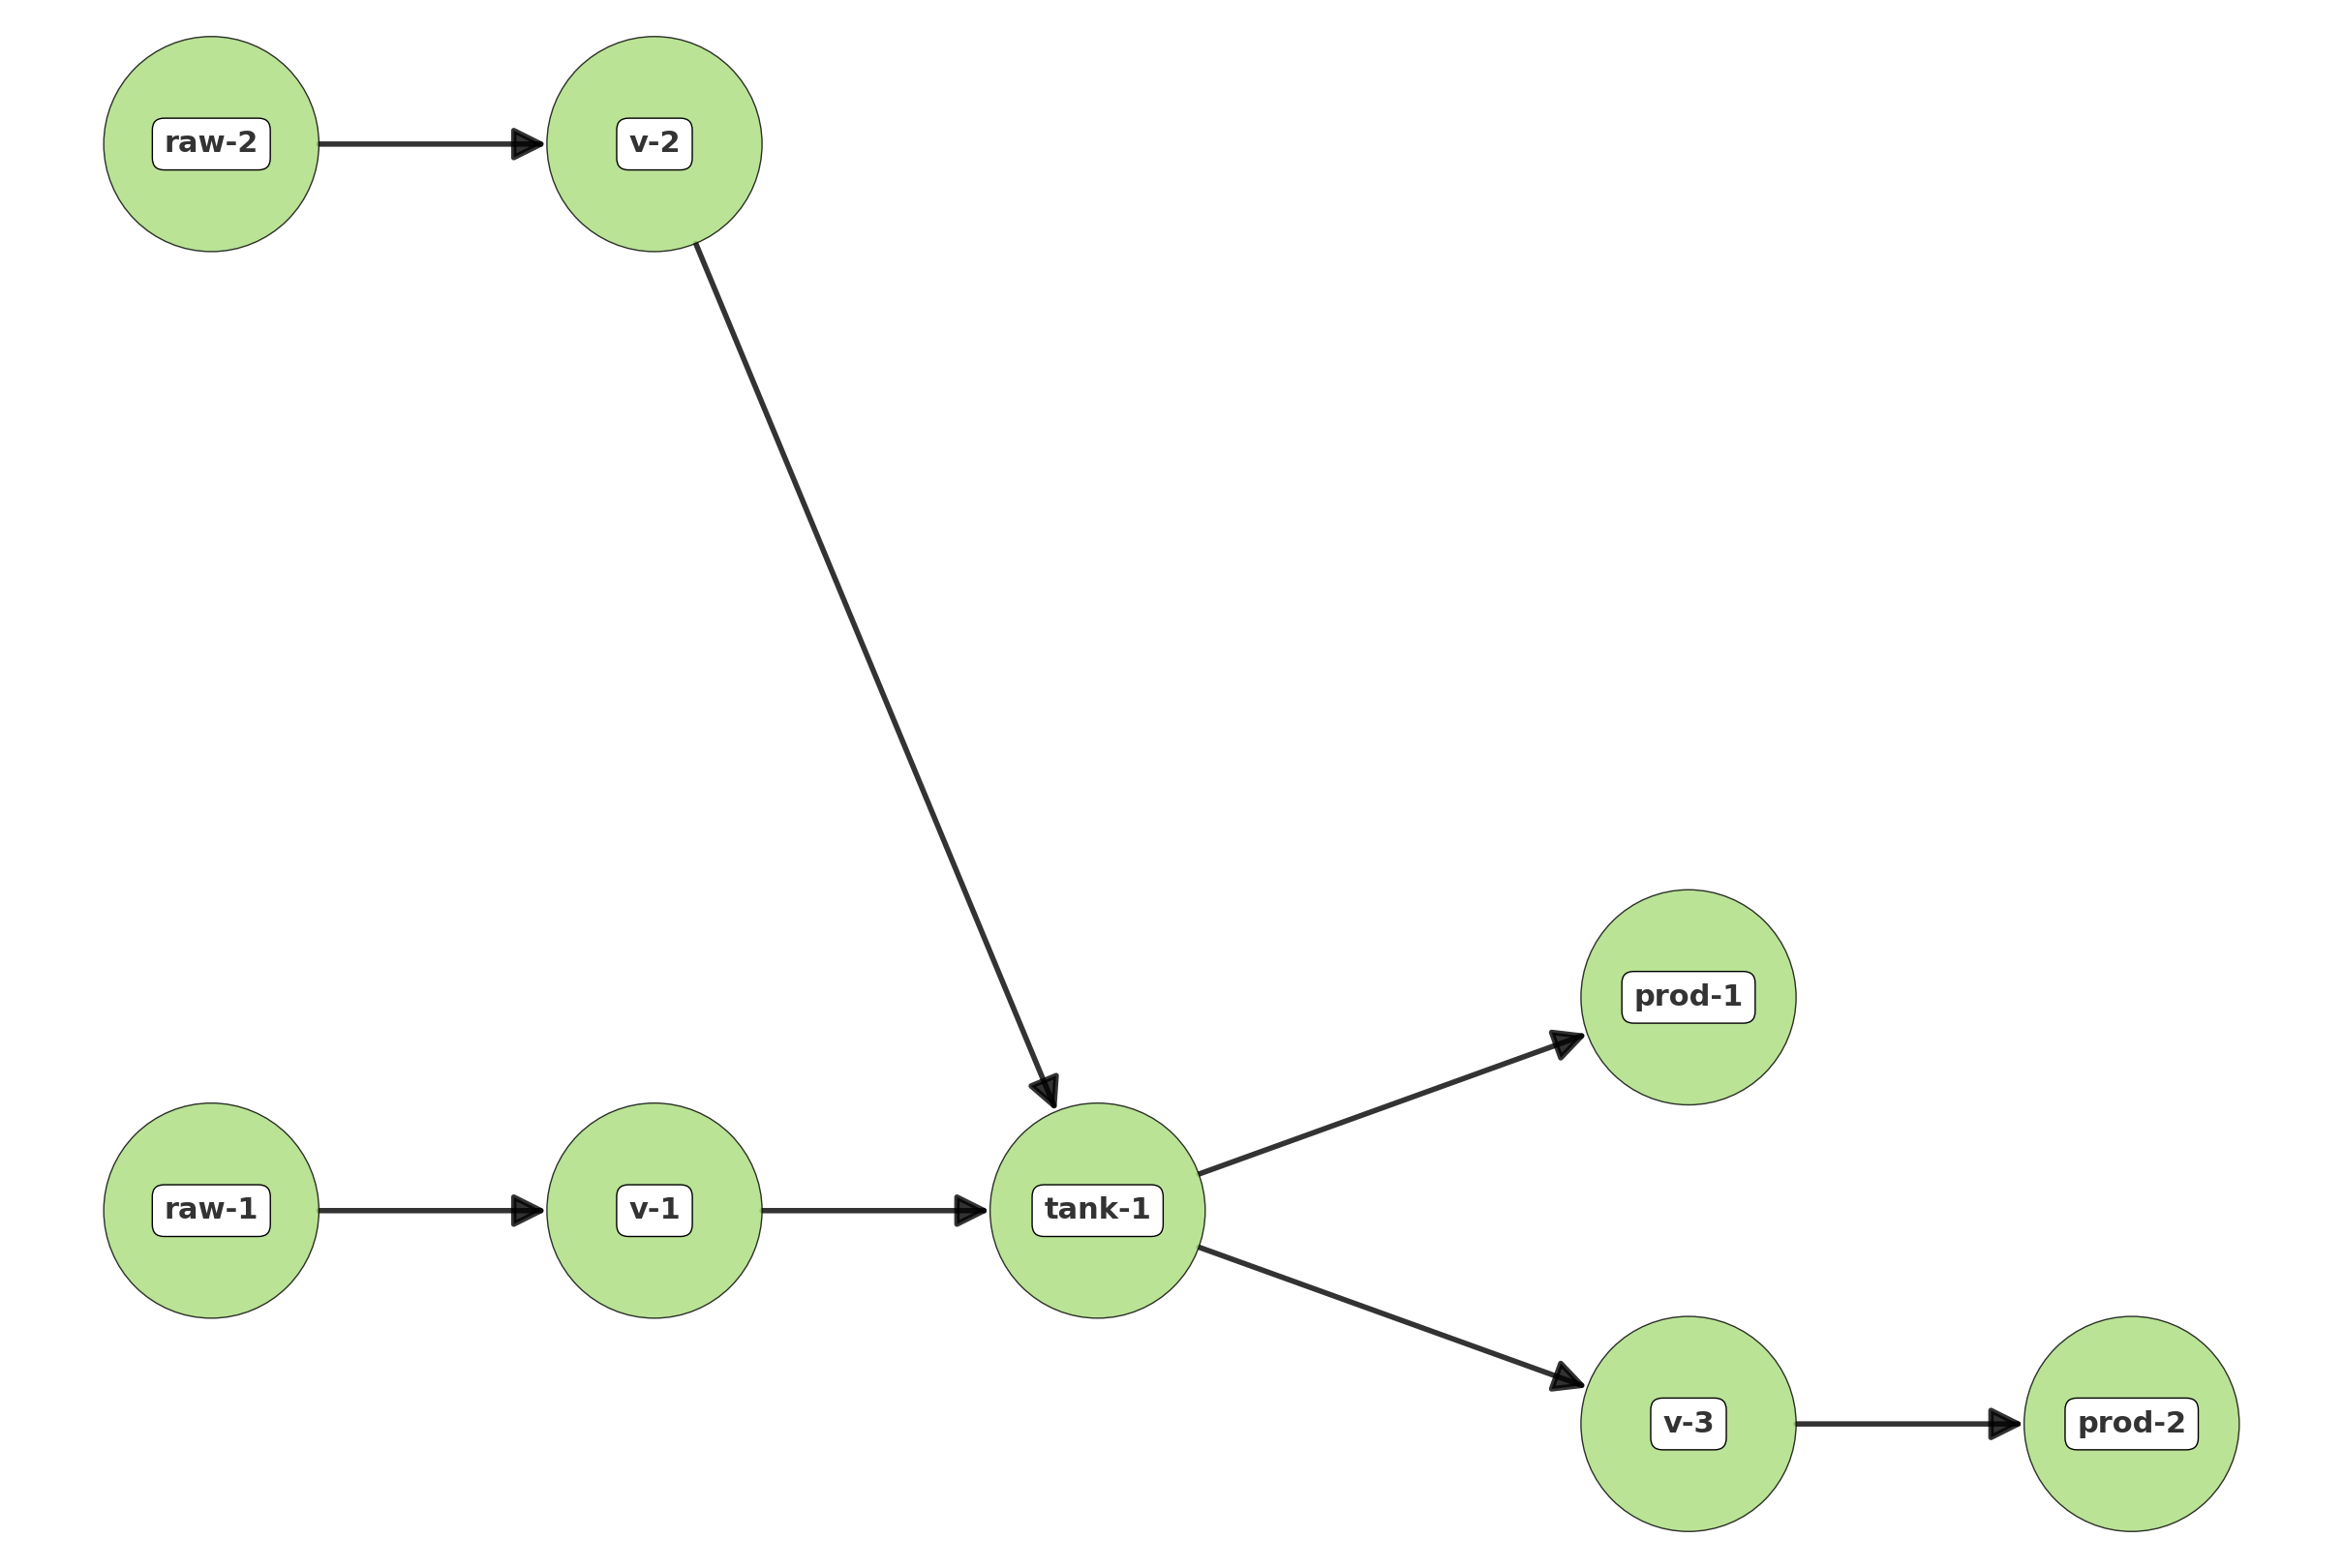

SFILE : (raw)(v)(tank)<&|(raw)(v)&|[(prod)](v)(prod)
Conversion from SFILES to graph and back to SFILES successful!



In [38]:
plotFlowSheet(graph_drum)
sfiles_generate_validate(graph_drum)

In [39]:
graph_drum_1 = nx.DiGraph()
graph_drum_1.add_edges_from([
    ("raw-1","v-1"),
    ("v-1","tank-1"),
    ("tank-1","prod-1"),
    ("tank-1","C-2/LC"),
    ("C-2/LC","C-3/FRC",{"tags":{"signal": ["not_next_unitop"]}}),
    ("C-3/FRC","C-4/FC",{"tags":{"signal": ["not_next_unitop"]}}),
    ("C-4/FC","v-2",{"tags":{"signal": ["next_unitop"]}}),
    ("tank-1","C-1/PC"),
    ("C-1/PC","v-3"),
    ("raw-2","C-4/FC"),
    ("v-2","tank-1"),
    ("tank-1","C-5/FI"),
    ("C-5/FI","C-3/FRC",{"tags":{"signal": ["not_next_unitop"]}}),
    ("v-3","prod-2")
])

Number of unit operations = 8
Number of controllers = 4
Number of indicators = 1 
Number of transmitters = 0


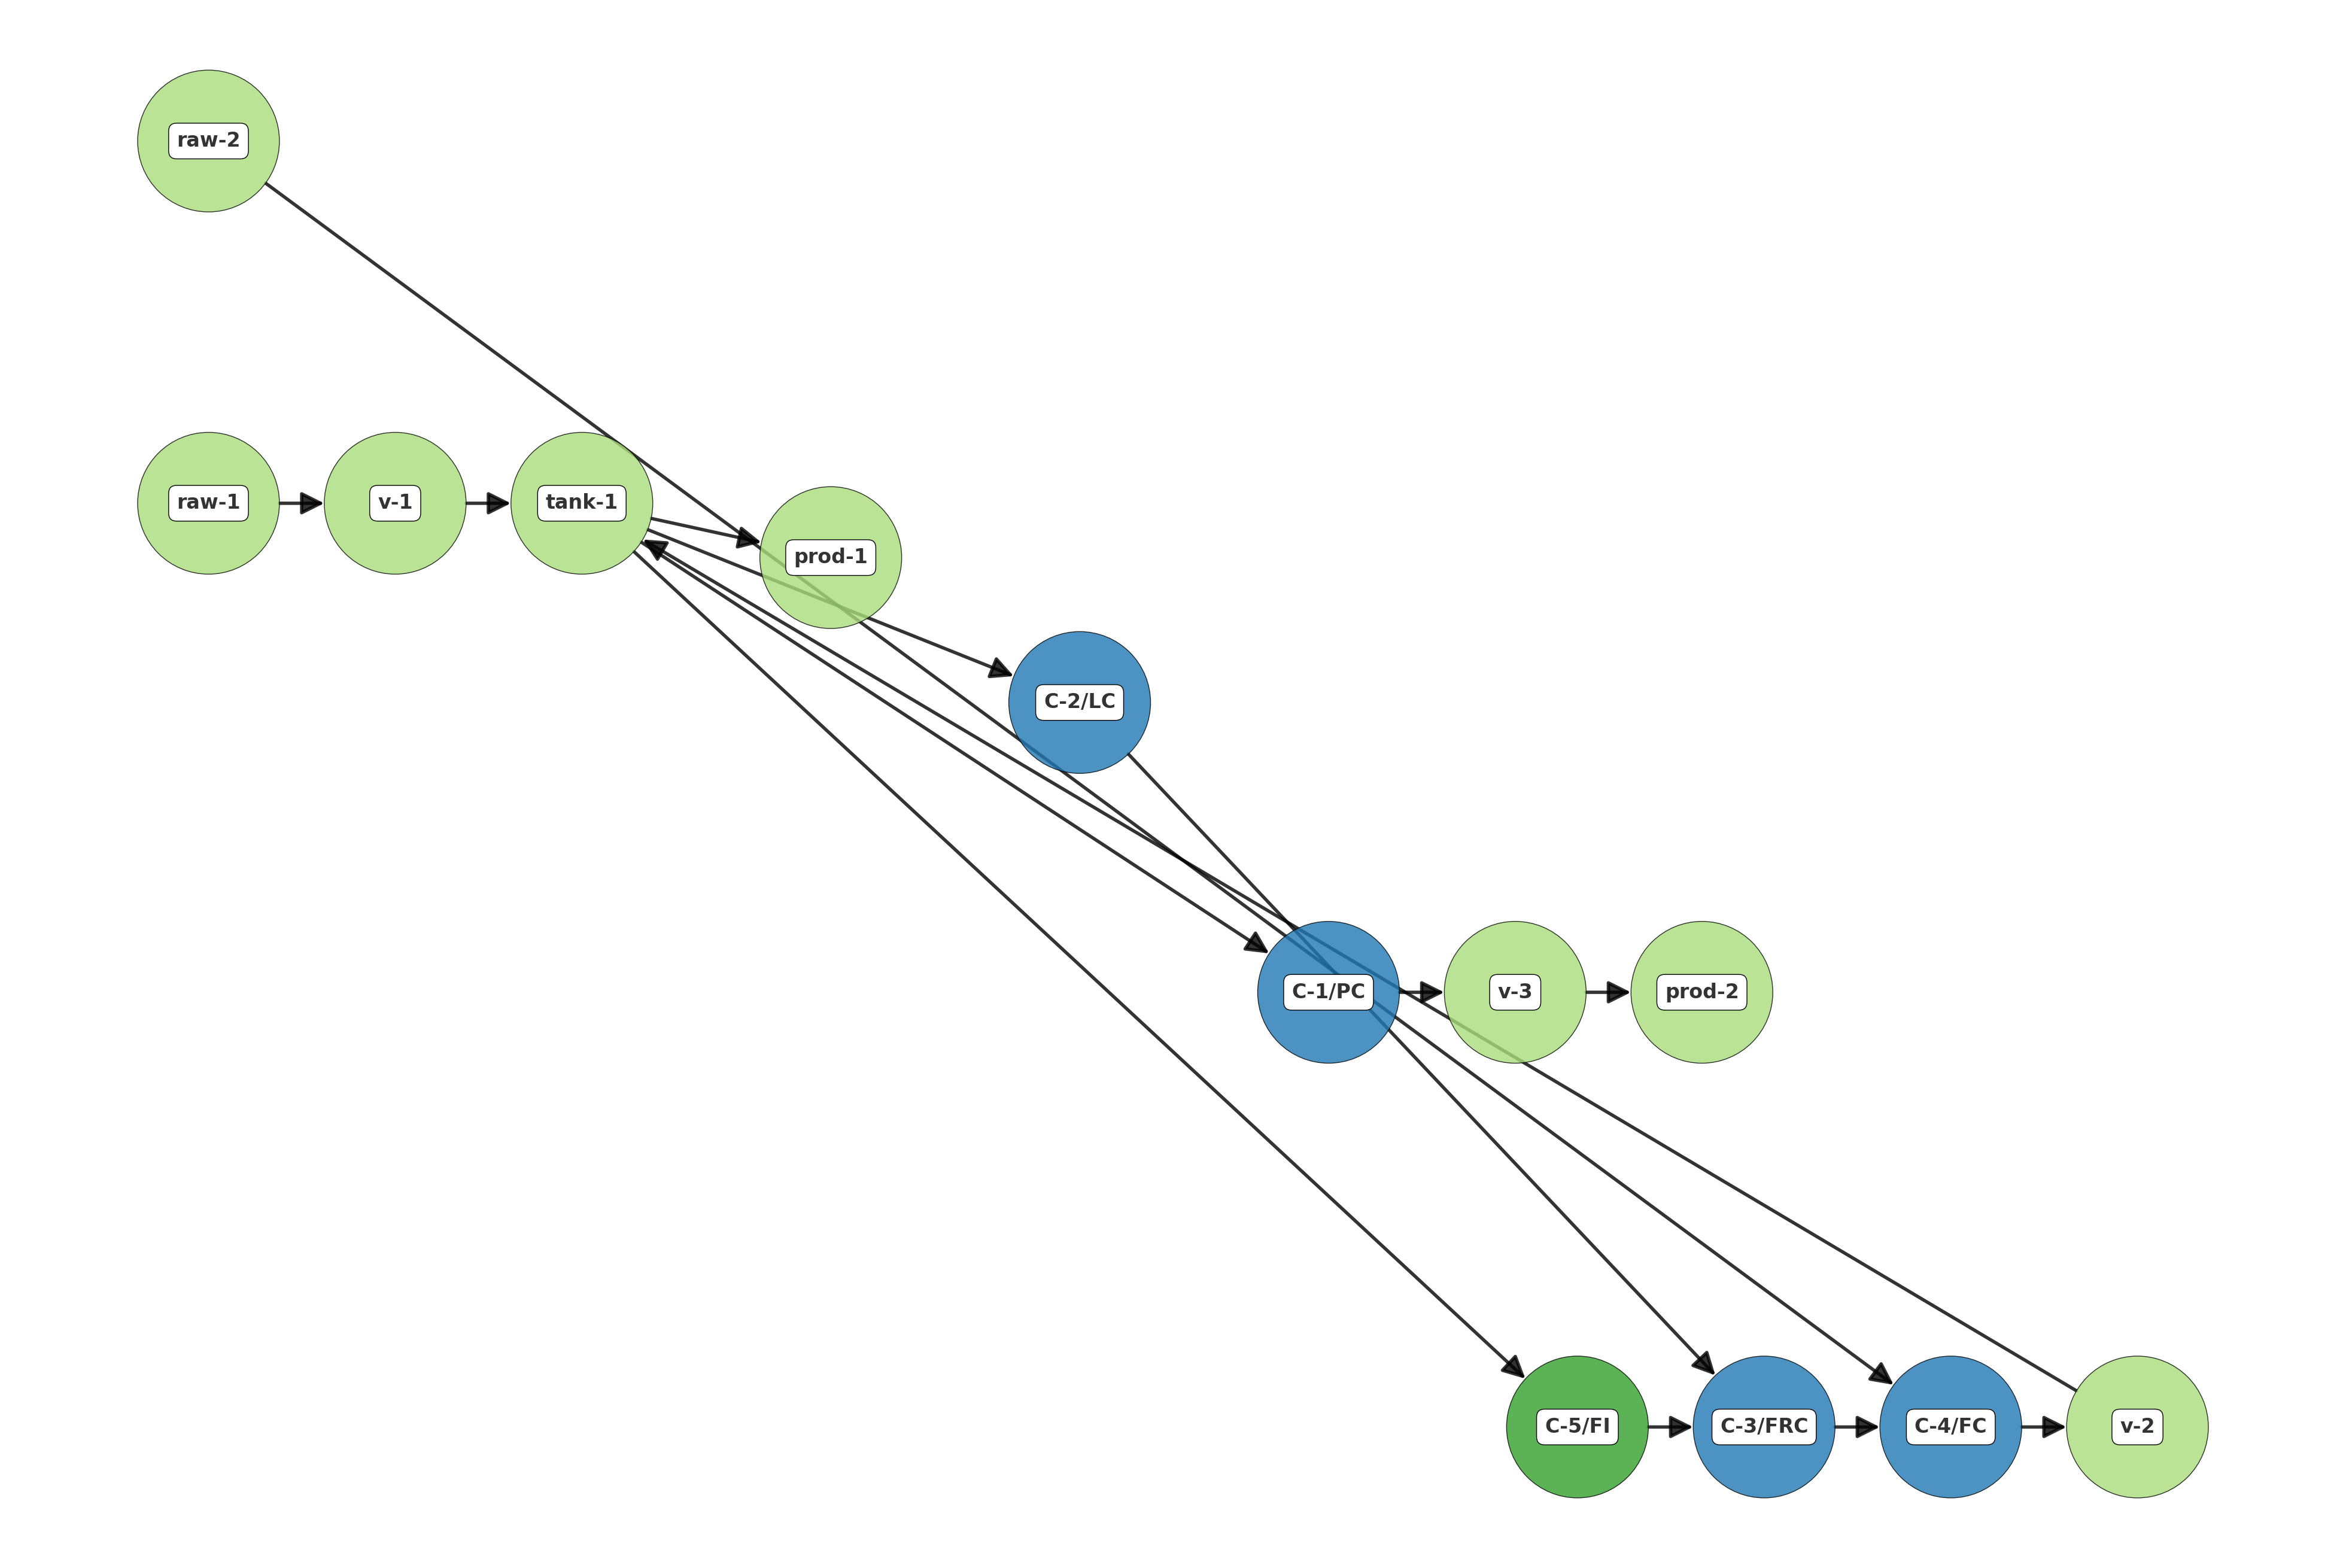

SFILE : (raw)(C){FC}_1<_4(v)<_1(tank)<&|(raw)(v)&|[(C){LC}_2][(C){FI}_3][(prod)](C){PC}(v)(prod)n|(C){FRC}_4<_2<_3
Conversion from SFILES to graph and back to SFILES successful!



In [40]:
plotFlowSheet(graph_drum_1)
sfiles_generate_validate(graph_drum_1)